# Credit EDA Case Study

## Introduction

This assignment aims to give you an idea of applying EDA in a real business scenario. In this assignment, apart from applying the techniques that you have learnt in the EDA module, you will also develop a basic understanding of risk analytics in banking and financial services and understand how data is used to minimise the risk of losing money while lending to customers.

## Problem Statement

When the company receives a loan application, the company has to decide for loan approval based on the applicant’s profile. Two types of risks are associated with the bank’s decision:

- If the applicant is likely to repay the loan, then not approving the loan results in a loss of business to the company

- If the applicant is not likely to repay the loan, i.e. he/she is likely to default, then approving the loan may lead to a financial loss for the company.

Use EDA to understand how consumer attributes and loan attributes influence the tendency of default.

## Business Objectives

This case study aims to identify patterns which indicate if a client has difficulty paying their installments which may be used for taking actions such as denying the loan, reducing the amount of loan, lending (to risky applicants) at a higher interest rate, etc. This will ensure that the consumers capable of repaying the loan are not rejected. Identification of such applicants using EDA is the aim of this case study.

In other words, the company wants to understand the driving factors (or driver variables) behind loan default, i.e. the variables which are strong indicators of default.  The company can utilise this knowledge for its portfolio and risk assessment.

## 1. Pre-requisites :-

### 1.1 Import Libraries

In [322]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

### 1.2 Import & Read Dataset

'application_data.csv'  contains all the information of the client at the time of application.
The data is about whether a client has payment difficulties.

#### Import Dataset

In [323]:
data = pd.read_csv(r'application_data.csv')

# Changing the max rows/columns value
pd.set_option('max_columns',None)
pd.set_option('max_rows',None)

#### Read Dataset

In [324]:
data.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OWN_CAR_AGE,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,APARTMENTS_AVG,BASEMENTAREA_AVG,YEARS_BEGINEXPLUATATION_AVG,YEARS_BUILD_AVG,COMMONAREA_AVG,ELEVATORS_AVG,ENTRANCES_AVG,FLOORSMAX_AVG,FLOORSMIN_AVG,LANDAREA_AVG,LIVINGAPARTMENTS_AVG,LIVINGAREA_AVG,NONLIVINGAPARTMENTS_AVG,NONLIVINGAREA_AVG,APARTMENTS_MODE,BASEMENTAREA_MODE,YEARS_BEGINEXPLUATATION_MODE,YEARS_BUILD_MODE,COMMONAREA_MODE,ELEVATORS_MODE,ENTRANCES_MODE,FLOORSMAX_MODE,FLOORSMIN_MODE,LANDAREA_MODE,LIVINGAPARTMENTS_MODE,LIVINGAREA_MODE,NONLIVINGAPARTMENTS_MODE,NONLIVINGAREA_MODE,APARTMENTS_MEDI,BASEMENTAREA_MEDI,YEARS_BEGINEXPLUATATION_MEDI,YEARS_BUILD_MEDI,COMMONAREA_MEDI,ELEVATORS_MEDI,ENTRANCES_MEDI,FLOORSMAX_MEDI,FLOORSMIN_MEDI,LANDAREA_MEDI,LIVINGAPARTMENTS_MEDI,LIVINGAREA_MEDI,NONLIVINGAPARTMENTS_MEDI,NONLIVINGAREA_MEDI,FONDKAPREMONT_MODE,HOUSETYPE_MODE,TOTALAREA_MODE,WALLSMATERIAL_MODE,EMERGENCYSTATE_MODE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,351000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.018801,-9461,-637,-3648.0,-2120,NaN,1,1,0,1,1,0,Laborers,1.0,2,2,WEDNESDAY,10,0,0,0,0,0,0,Business Entity Type 3,0.083037,0.262949,0.139376,0.0247,0.0369,0.9722,0.6192,0.0143,0.00,0.0690,0.0833,0.1250,0.0369,0.0202,0.0190,0.0000,0.0000,0.0252,0.0383,0.9722,0.6341,0.0144,0.0000,0.0690,0.0833,0.1250,0.0377,0.022,0.0198,0.0,0.0,0.0250,0.0369,0.9722,0.6243,0.0144,0.00,0.0690,0.0833,0.1250,0.0375,0.0205,0.0193,0.0000,0.00,reg oper account,block of flats,0.0149,"Stone, brick",No,2.0,2.0,2.0,2.0,-1134.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,1129500.0,Family,State servant,Higher education,Married,House / apartment,0.003541,-16765,-1188,-1186.0,-291,NaN,1,1,0,1,1,0,Core staff,2.0,1,1,MONDAY,11,0,0,0,0,0,0,School,0.311267,0.622246,NaN,0.0959,0.0529,0.9851,0.7960,0.0605,0.08,0.0345,0.2917,0.3333,0.0130,0.0773,0.0549,0.0039,0.0098,0.0924,0.0538,0.9851,0.8040,0.0497,0.0806,0.0345,0.2917,0.3333,0.0128,0.079,0.0554,0.0,0.0,0.0968,0.0529,0.9851,0.7987,0.0608,0.08,0.0345,0.2917,0.3333,0.0132,0.0787,0.0558,0.0039,0.01,reg oper account,block of flats,0.0714,Block,No,1.0,0.0,1.0,0.0,-828.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,135000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.010032,-19046,-225,-4260.0,-2531,26.0,1,1,1,1,1,0,Laborers,1.0,2,2,MONDAY,9,0,0,0,0,0,0,Government,NaN,0.555912,0.729567,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,

## 2. Check the Structure of the Data

### 2.1 shape attribute stores the number of rows and columns as a tuple

In [325]:
data.shape

(307511, 122)

- Number of Rows : 307511
- Number of Columns : 122

### 2.2 Information about the DataFrame

info() diplays Columns Labels with it Dtypes

In [326]:
# Print the Full Summary
data.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Data columns (total 122 columns):
 #    Column                        Dtype  
---   ------                        -----  
 0    SK_ID_CURR                    int64  
 1    TARGET                        int64  
 2    NAME_CONTRACT_TYPE            object 
 3    CODE_GENDER                   object 
 4    FLAG_OWN_CAR                  object 
 5    FLAG_OWN_REALTY               object 
 6    CNT_CHILDREN                  int64  
 7    AMT_INCOME_TOTAL              float64
 8    AMT_CREDIT                    float64
 9    AMT_ANNUITY                   float64
 10   AMT_GOODS_PRICE               float64
 11   NAME_TYPE_SUITE               object 
 12   NAME_INCOME_TYPE              object 
 13   NAME_EDUCATION_TYPE           object 
 14   NAME_FAMILY_STATUS            object 
 15   NAME_HOUSING_TYPE             object 
 16   REGION_POPULATION_RELATIVE    float64
 17   DAYS_BIRTH                    int64  
 18   DA

### 2.3 Summary Statistics for Numerical Columns

In [327]:
data.describe(include='all')

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OWN_CAR_AGE,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,APARTMENTS_AVG,BASEMENTAREA_AVG,YEARS_BEGINEXPLUATATION_AVG,YEARS_BUILD_AVG,COMMONAREA_AVG,ELEVATORS_AVG,ENTRANCES_AVG,FLOORSMAX_AVG,FLOORSMIN_AVG,LANDAREA_AVG,LIVINGAPARTMENTS_AVG,LIVINGAREA_AVG,NONLIVINGAPARTMENTS_AVG,NONLIVINGAREA_AVG,APARTMENTS_MODE,BASEMENTAREA_MODE,YEARS_BEGINEXPLUATATION_MODE,YEARS_BUILD_MODE,COMMONAREA_MODE,ELEVATORS_MODE,ENTRANCES_MODE,FLOORSMAX_MODE,FLOORSMIN_MODE,LANDAREA_MODE,LIVINGAPARTMENTS_MODE,LIVINGAREA_MODE,NONLIVINGAPARTMENTS_MODE,NONLIVINGAREA_MODE,APARTMENTS_MEDI,BASEMENTAREA_MEDI,YEARS_BEGINEXPLUATATION_MEDI,YEARS_BUILD_MEDI,COMMONAREA_MEDI,ELEVATORS_MEDI,ENTRANCES_MEDI,FLOORSMAX_MEDI,FLOORSMIN_MEDI,LANDAREA_MEDI,LIVINGAPARTMENTS_MEDI,LIVINGAREA_MEDI,NONLIVINGAPARTMENTS_MEDI,NONLIVINGAREA_MEDI,FONDKAPREMONT_MODE,HOUSETYPE_MODE,TOTALAREA_MODE,WALLSMATERIAL_MODE,EMERGENCYSTATE_MODE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
count,307511.000000,307511.000000,307511,307511,307511,307511,307511.000000,3.075110e+05,3.075110e+05,307499.000000,3.072330e+05,306219,307511,307511,307511,307511,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,104582.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,211120,307509.000000,307511.000000,307511.000000,307511,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511,134133.000000,3.068510e+05,246546.000000,151450.00000,127568.000000,157504.000000,103023.000000,92646.000000,143620.000000,152683.000000,154491.000000,98869.000000,124921.000000,97312.000000,153161.000000,93997.000000,137829.000000,151450.000000,127568.000000,157504.000000,103023.000000,92646.000000,143620.000000,152683.000000,154491.000000,98869.000000,124921.000000,97312.000000,153161.000000,93997.000000,137829.000000,151450.000000,127568.000000,157504.000000,103023.000000,92646.000000,143620.000000,152683.000000,154491.000000,98869.000000,124921.000000,97312.000000,153161.000000,93997.000000,137829.000000,97216,153214,159080.000000,151170,161756,306490.000000,306490.000000,306490.000000,306490.000000,307510.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.00000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,265992.000000,265992.000000,265992.000000,265992.000000,265992.000000,265992.000000
unique,NaN,NaN,2,3,2,2,NaN,NaN,NaN,NaN,NaN,7,8,5,6,6,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,18,NaN,NaN,NaN,7,NaN,NaN,NaN,NaN,NaN,NaN,NaN,58,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Na

## 3. Data Quality Check & Missing Values

### 3.1 Finding % of Missing Values for all Columns/Variables

In [328]:
data.isnull().mean().sort_values(ascending=False)*100

COMMONAREA_MEDI                 69.872297
COMMONAREA_AVG                  69.872297
COMMONAREA_MODE                 69.872297
NONLIVINGAPARTMENTS_MODE        69.432963
NONLIVINGAPARTMENTS_AVG         69.432963
NONLIVINGAPARTMENTS_MEDI        69.432963
FONDKAPREMONT_MODE              68.386172
LIVINGAPARTMENTS_MODE           68.354953
LIVINGAPARTMENTS_AVG            68.354953
LIVINGAPARTMENTS_MEDI           68.354953
FLOORSMIN_AVG                   67.848630
FLOORSMIN_MODE                  67.848630
FLOORSMIN_MEDI                  67.848630
YEARS_BUILD_MEDI                66.497784
YEARS_BUILD_MODE                66.497784
YEARS_BUILD_AVG                 66.497784
OWN_CAR_AGE                     65.990810
LANDAREA_MEDI                   59.376738
LANDAREA_MODE                   59.376738
LANDAREA_AVG                    59.376738
BASEMENTAREA_MEDI               58.515956
BASEMENTAREA_AVG                58.515956
BASEMENTAREA_MODE               58.515956
EXT_SOURCE_1                    56

### 3.2 Removing columns with Missing Values more than 45%

Droping the entries that are missing as the percentage of missing values in a column is very large (45%)

In [329]:
data = data.loc[:,(data.isnull().mean()*100 <=45)]
data.shape

(307511, 73)

- 49 Columns Removed
- These Columns are namely :

COMMONAREA_MEDI COMMONAREA_AVG COMMONAREA_MODE NONLIVINGAPARTMENTS_MODE NONLIVINGAPARTMENTS_AVG NONLIVINGAPARTMENTS_MEDI 
FONDKAPREMONT_MODE LIVINGAPARTMENTS_MODE LIVINGAPARTMENTS_AVG LIVINGAPARTMENTS_MEDI FLOORSMIN_AVG FLOORSMIN_MODE FLOORSMIN_MEDI 
YEARS_BUILD_MEDI YEARS_BUILD_MODE YEARS_BUILD_AVG OWN_CAR_AGE LANDAREA_MEDI LANDAREA_MODE LANDAREA_AVG BASEMENTAREA_MEDI 
BASEMENTAREA_AVG BASEMENTAREA_MODE EXT_SOURCE_1 NONLIVINGAREA_MODE NONLIVINGAREA_AVG NONLIVINGAREA_MEDI ELEVATORS_MEDI 
ELEVATORS_AVG ELEVATORS_MODE WALLSMATERIAL_MODE APARTMENTS_MEDI APARTMENTS_AVG APARTMENTS_MODE ENTRANCES_MEDI ENTRANCES_AVG
ENTRANCES_MODE LIVINGAREA_AVG LIVINGAREA_MODE LIVINGAREA_MEDI HOUSETYPE_MODE FLOORSMAX_MODE FLOORSMAX_MEDI FLOORSMAX_AVG 
YEARS_BEGINEXPLUATATION_MODE YEARS_BEGINEXPLUATATION_MEDI YEARS_BEGINEXPLUATATION_AVG TOTALAREA_MODE EMERGENCYSTATE_MODE

### 3.3 Removing Insignificant Columns

- These Columns are Insignificant as they don't provide any meaningfull information for Data Analysis.

In [330]:
insignificant = ['REGION_POPULATION_RELATIVE','FLAG_MOBIL','FLAG_EMP_PHONE', 'FLAG_WORK_PHONE', 'FLAG_CONT_MOBILE', 'FLAG_PHONE','FLAG_EMAIL',
                 'REGION_RATING_CLIENT', 'REGION_RATING_CLIENT_W_CITY',
                 'WEEKDAY_APPR_PROCESS_START', 'HOUR_APPR_PROCESS_START',
                 'REG_REGION_NOT_LIVE_REGION', 'REG_REGION_NOT_WORK_REGION','LIVE_REGION_NOT_WORK_REGION', 'REG_CITY_NOT_LIVE_CITY','REG_CITY_NOT_WORK_CITY', 'LIVE_CITY_NOT_WORK_CITY',
                 'EXT_SOURCE_2', 'EXT_SOURCE_3',
                 'OBS_30_CNT_SOCIAL_CIRCLE', 'DEF_30_CNT_SOCIAL_CIRCLE','OBS_60_CNT_SOCIAL_CIRCLE', 'DEF_60_CNT_SOCIAL_CIRCLE',
                 'FLAG_DOCUMENT_2', 'FLAG_DOCUMENT_3','FLAG_DOCUMENT_4', 'FLAG_DOCUMENT_5', 'FLAG_DOCUMENT_6','FLAG_DOCUMENT_7', 'FLAG_DOCUMENT_8', 'FLAG_DOCUMENT_9','FLAG_DOCUMENT_10', 'FLAG_DOCUMENT_11', 'FLAG_DOCUMENT_12','FLAG_DOCUMENT_13', 'FLAG_DOCUMENT_14', 'FLAG_DOCUMENT_15','FLAG_DOCUMENT_16', 'FLAG_DOCUMENT_17', 'FLAG_DOCUMENT_18','FLAG_DOCUMENT_19', 'FLAG_DOCUMENT_20', 'FLAG_DOCUMENT_21',
                 'AMT_REQ_CREDIT_BUREAU_HOUR', 'AMT_REQ_CREDIT_BUREAU_DAY','AMT_REQ_CREDIT_BUREAU_WEEK', 'AMT_REQ_CREDIT_BUREAU_MON','AMT_REQ_CREDIT_BUREAU_QRT', 'AMT_REQ_CREDIT_BUREAU_YEAR']
data.drop(labels= insignificant,axis=1,inplace=True)
data.shape

(307511, 24)

### 3.4 Handling Missing Values

#### 3.4.1 Checking % of null values & Count for each column

In [331]:
data.isnull().mean().sort_values(ascending=False)*100

OCCUPATION_TYPE           31.345545
NAME_TYPE_SUITE            0.420148
AMT_GOODS_PRICE            0.090403
AMT_ANNUITY                0.003902
CNT_FAM_MEMBERS            0.000650
DAYS_LAST_PHONE_CHANGE     0.000325
NAME_FAMILY_STATUS         0.000000
ORGANIZATION_TYPE          0.000000
DAYS_ID_PUBLISH            0.000000
DAYS_REGISTRATION          0.000000
DAYS_EMPLOYED              0.000000
DAYS_BIRTH                 0.000000
NAME_HOUSING_TYPE          0.000000
SK_ID_CURR                 0.000000
NAME_EDUCATION_TYPE        0.000000
TARGET                     0.000000
AMT_CREDIT                 0.000000
AMT_INCOME_TOTAL           0.000000
CNT_CHILDREN               0.000000
FLAG_OWN_REALTY            0.000000
FLAG_OWN_CAR               0.000000
CODE_GENDER                0.000000
NAME_CONTRACT_TYPE         0.000000
NAME_INCOME_TYPE           0.000000
dtype: float64

In [332]:
data.isnull().sum().sort_values(ascending=False)

OCCUPATION_TYPE           96391
NAME_TYPE_SUITE            1292
AMT_GOODS_PRICE             278
AMT_ANNUITY                  12
CNT_FAM_MEMBERS               2
DAYS_LAST_PHONE_CHANGE        1
NAME_FAMILY_STATUS            0
ORGANIZATION_TYPE             0
DAYS_ID_PUBLISH               0
DAYS_REGISTRATION             0
DAYS_EMPLOYED                 0
DAYS_BIRTH                    0
NAME_HOUSING_TYPE             0
SK_ID_CURR                    0
NAME_EDUCATION_TYPE           0
TARGET                        0
AMT_CREDIT                    0
AMT_INCOME_TOTAL              0
CNT_CHILDREN                  0
FLAG_OWN_REALTY               0
FLAG_OWN_CAR                  0
CODE_GENDER                   0
NAME_CONTRACT_TYPE            0
NAME_INCOME_TYPE              0
dtype: int64

- NAME_TYPE_SUITE, AMT_GOODS_PRICE, AMT_ANNUITY, CNT_FAM_MEMBERS, DAYS_LAST_PHONE_CHANGE have MVs < 1%
- As such dropping these records won't affect our Analysis
- Its too low to ffect our Analysis, so they can be dropped. But, for sake of this Case-Study we'll be impute it.
- We'll leave OCCUPATION_TYPE Column as it is since it has 31% MVs

#### Dropping a record at DAYS_LAST_PHONE_CHANGE

Since there's a single record misssing, we'll drop it

In [333]:
data = data[~data.DAYS_LAST_PHONE_CHANGE.isnull()]
data.DAYS_LAST_PHONE_CHANGE.isnull().sum()

0

### 3.4.2 Imputing Missing Values

#### 3.4.2.1 Imputing Categorical Columns 

##### - NAME_TYPE_SUITE

- It represents Who was accompanying client when he was applying for the loan
- Imputing 1292 MVs with 'Unaccompanied'(Mode)
- its safe (most likely) to assume MVs might be 'Unaccompanied' as it is seen Unaccompanied clients account for more than 81% of Spectrum.

In [334]:
data.NAME_TYPE_SUITE.value_counts()

Unaccompanied      248525
Family              40149
Spouse, partner     11370
Children             3267
Other_B              1770
Other_A               866
Group of people       271
Name: NAME_TYPE_SUITE, dtype: int64

In [335]:
data.NAME_TYPE_SUITE.mode()

0    Unaccompanied
dtype: object

In [336]:
data.NAME_TYPE_SUITE.fillna(data.NAME_TYPE_SUITE.mode()[0], inplace = True)
data.NAME_TYPE_SUITE.value_counts()

Unaccompanied      249817
Family              40149
Spouse, partner     11370
Children             3267
Other_B              1770
Other_A               866
Group of people       271
Name: NAME_TYPE_SUITE, dtype: int64

##### - CODE_GENDER denotes Gender of the client

Imputing 'XNA' Values from CODE_GENDER Column with 'F'( Mode )
- There are just 4 'XNA' values & its safe (most likely) to assume it might be 'F' as it is seen Females account for more than 60% of Spectrum.

In [337]:
data.CODE_GENDER.value_counts()

F      202448
M      105058
XNA         4
Name: CODE_GENDER, dtype: int64

In [338]:
data.CODE_GENDER.mode()

0    F
dtype: object

In [339]:
data.CODE_GENDER.replace('XNA','F',inplace=True)
data.CODE_GENDER.value_counts()

F    202452
M    105058
Name: CODE_GENDER, dtype: int64

Not Treating 'XNA' of ORGANIZATION_TYPE Column !

### 3.4.2.2 Imputing Numerical Columns

- Imputing Missing Values of 'AMT_GOODS_PRICE','AMT_ANNUITY' &'CNT_FAM_MEMBERS' with Median

In [340]:
missing_num_cols = ['AMT_GOODS_PRICE','AMT_ANNUITY','CNT_FAM_MEMBERS']
for i in missing_num_cols:
    data[i].fillna(data[i].median(), inplace = True)
data.isnull().sum()

SK_ID_CURR                    0
TARGET                        0
NAME_CONTRACT_TYPE            0
CODE_GENDER                   0
FLAG_OWN_CAR                  0
FLAG_OWN_REALTY               0
CNT_CHILDREN                  0
AMT_INCOME_TOTAL              0
AMT_CREDIT                    0
AMT_ANNUITY                   0
AMT_GOODS_PRICE               0
NAME_TYPE_SUITE               0
NAME_INCOME_TYPE              0
NAME_EDUCATION_TYPE           0
NAME_FAMILY_STATUS            0
NAME_HOUSING_TYPE             0
DAYS_BIRTH                    0
DAYS_EMPLOYED                 0
DAYS_REGISTRATION             0
DAYS_ID_PUBLISH               0
OCCUPATION_TYPE           96390
CNT_FAM_MEMBERS               0
ORGANIZATION_TYPE             0
DAYS_LAST_PHONE_CHANGE        0
dtype: int64

### 3.4 Check the datatypes of all the columns & Fix Datatypes

In [341]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 307510 entries, 0 to 307510
Data columns (total 24 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   SK_ID_CURR              307510 non-null  int64  
 1   TARGET                  307510 non-null  int64  
 2   NAME_CONTRACT_TYPE      307510 non-null  object 
 3   CODE_GENDER             307510 non-null  object 
 4   FLAG_OWN_CAR            307510 non-null  object 
 5   FLAG_OWN_REALTY         307510 non-null  object 
 6   CNT_CHILDREN            307510 non-null  int64  
 7   AMT_INCOME_TOTAL        307510 non-null  float64
 8   AMT_CREDIT              307510 non-null  float64
 9   AMT_ANNUITY             307510 non-null  float64
 10  AMT_GOODS_PRICE         307510 non-null  float64
 11  NAME_TYPE_SUITE         307510 non-null  object 
 12  NAME_INCOME_TYPE        307510 non-null  object 
 13  NAME_EDUCATION_TYPE     307510 non-null  object 
 14  NAME_FAMILY_STATUS  

#### 3.4.1 Converting dtype of Columns from 'oject' to 'category'

In [342]:
category_cols = ['NAME_CONTRACT_TYPE','CODE_GENDER','FLAG_OWN_CAR','FLAG_OWN_REALTY','NAME_TYPE_SUITE',
                 'NAME_INCOME_TYPE','NAME_EDUCATION_TYPE','NAME_FAMILY_STATUS','NAME_HOUSING_TYPE',
                 'OCCUPATION_TYPE','ORGANIZATION_TYPE']

for i in category_cols:
    data[i] = data[i].astype('category')

#### 3.4.2 Converting '-ve' values into Absolute Values

In [343]:
data.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OCCUPATION_TYPE,CNT_FAM_MEMBERS,ORGANIZATION_TYPE,DAYS_LAST_PHONE_CHANGE
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,351000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,-9461,-637,-3648.0,-2120,Laborers,1.0,Business Entity Type 3,-1134.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,1129500.0,Family,State servant,Higher education,Married,House / apartment,-16765,-1188,-1186.0,-291,Core staff,2.0,School,-828.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,135000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,-19046,-225,-4260.0,-2531,Laborers,1.0,Government,-815.0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,297000.0,Unaccompanied,Working,Secondary / secondary special,Civil marriage,House / apartment,-19005,-3039,-9833.0,-2437,Laborers,2.0,Business Entity Type 3,-617.0
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,513000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,-19932,-3038,-4311.0,-3458,Core staff,1.0,Religion,-1106.0


In [344]:
negative_cols = ['DAYS_BIRTH','DAYS_EMPLOYED','DAYS_REGISTRATION','DAYS_ID_PUBLISH','DAYS_LAST_PHONE_CHANGE']

for i in negative_cols:
    data[i] = data[i].abs()
    
data[['DAYS_BIRTH','DAYS_EMPLOYED','DAYS_REGISTRATION','DAYS_ID_PUBLISH','DAYS_LAST_PHONE_CHANGE']].head()

,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,DAYS_LAST_PHONE_CHANGE
0,9461,637,3648.0,2120,1134.0
1,16765,1188,1186.0,291,828.0
2,19046,225,4260.0,2531,815.0
3,19005,3039,9833.0,2437,617.0
4,19932,3038,4311.0,3458,1106.0


#### 3.4.3 Creating a Column 'AGE' from 'DAYS_BIRTH'

In [345]:
data.insert(16,'AGE',data['DAYS_BIRTH']//365)
data.drop(labels = 'DAYS_BIRTH', axis=1, inplace = True)

data['AGE'].head()

0    25
1    45
2    52
3    52
4    54
Name: AGE, dtype: int64

- 'AGE' Column replaces 'DAYS_BIRTH'
- Since 'DAYS_BIRTH'is droped, Number of Columns remains same

In [346]:
data.shape

(307510, 24)

### Binning

1. Binning  'AGE'  into  'AGE_GROUP'
- A new Categorical Column  'AGE_GROUP'  is created from  'AGE'  by binning it into 4 groups namely 'Youth','Young','Middle_Age' &'Elderly'.
- In Data Analysis, Age groups are more important than individual Age & also eases the Process.

In [347]:
data['AGE_GROUP'] = pd.cut(data['AGE'], bins=[18,30,40,50,100], 
                     labels=['Youth','Young','Middle_Age','Elderly'])

2. Binning  'AMT_INCOME_TOTAL'  into  'INCOME_GROUP'
- A new Categorical Column INCOME_GROUP is created from AMT_INCOME_TOTAL by binning it into 5 groups namely Very_Low, Lower_Middle, Upper_Middle & High,Ultra_high.
- In Data Analysis, Income groups are more important than individual Income & also eases the Process.m

In [348]:
data['INCOME_GROUP'] = pd.qcut(data.AMT_INCOME_TOTAL, q=[0, 0.25, 0.5, 0.75, 0.99, 1], 
                               labels=['Very_Low', 'Lower_Middle', 'Upper_Middle','High','Ultra_high'])

In [349]:
data[['AGE_GROUP','INCOME_GROUP']].head()

,AGE_GROUP,INCOME_GROUP
0,Youth,Upper_Middle
1,Middle_Age,High
2,Elderly,Very_Low
3,Elderly,Lower_Middle
4,Elderly,Lower_Middle


In [350]:
data.shape

(307510, 26)

- Thus, 2 New Columns are added for Data Analysis.

- Converting dtype of Columns from 'oject' to 'category'

In [351]:
data.AGE_GROUP = data.AGE_GROUP.astype('category')
data.INCOME_GROUP = data.INCOME_GROUP.astype('category')
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 307510 entries, 0 to 307510
Data columns (total 26 columns):
 #   Column                  Non-Null Count   Dtype   
---  ------                  --------------   -----   
 0   SK_ID_CURR              307510 non-null  int64   
 1   TARGET                  307510 non-null  int64   
 2   NAME_CONTRACT_TYPE      307510 non-null  category
 3   CODE_GENDER             307510 non-null  category
 4   FLAG_OWN_CAR            307510 non-null  category
 5   FLAG_OWN_REALTY         307510 non-null  category
 6   CNT_CHILDREN            307510 non-null  int64   
 7   AMT_INCOME_TOTAL        307510 non-null  float64 
 8   AMT_CREDIT              307510 non-null  float64 
 9   AMT_ANNUITY             307510 non-null  float64 
 10  AMT_GOODS_PRICE         307510 non-null  float64 
 11  NAME_TYPE_SUITE         307510 non-null  category
 12  NAME_INCOME_TYPE        307510 non-null  category
 13  NAME_EDUCATION_TYPE     307510 non-null  category
 14  NAME

## 4. Analysis

### 4.1 'FLAG_OWN_CAR' & 'FLAG_OWN_REALTY' Columns Conversion by Changing 'Y' and 'N' with 1 and 0.

- Numerical Variables helps in Deeper Analysis compared to Categorical Variables.

In [352]:
data['FLAG_OWN_CAR'] = np.where(data['FLAG_OWN_CAR']=='Y', 1 , 0)
data['FLAG_OWN_REALTY'] = np.where(data['FLAG_OWN_REALTY']=='Y', 1 , 0)
data[['FLAG_OWN_CAR','FLAG_OWN_REALTY']].head()

,FLAG_OWN_CAR,FLAG_OWN_REALTY
0,0,1
1,0,0
2,1,1
3,0,1
4,0,1


### 4.2 Creating Numerical / Categorical Columns List

#### Numerical Columns

In [353]:
numerical_cols = ['CNT_CHILDREN','CNT_FAM_MEMBERS',
             'AMT_INCOME_TOTAL','AMT_CREDIT','AMT_ANNUITY','AMT_GOODS_PRICE','AGE',
             'DAYS_EMPLOYED','DAYS_REGISTRATION','DAYS_ID_PUBLISH','DAYS_LAST_PHONE_CHANGE']

In [354]:
#data['CNT_CHILDREN'].describe()
#data['CNT_CHILDREN'].quantile([0.5,0.75,0.9,0.95,0.99])

#### Categorical Columns

In [355]:
category_cols = ['CODE_GENDER','AGE_GROUP','FLAG_OWN_CAR','FLAG_OWN_REALTY','NAME_CONTRACT_TYPE','NAME_TYPE_SUITE',
                 'NAME_INCOME_TYPE','INCOME_GROUP','NAME_EDUCATION_TYPE','NAME_FAMILY_STATUS','NAME_HOUSING_TYPE',
                 'OCCUPATION_TYPE']
#'ORGANIZATION_TYPE'

### 4.3 Check the Imbalance percentage

In [356]:
data['TARGET'].value_counts()

0    282685
1     24825
Name: TARGET, dtype: int64

In [357]:
data['TARGET'].value_counts(normalize = True)*100

0    91.927092
1     8.072908
Name: TARGET, dtype: float64

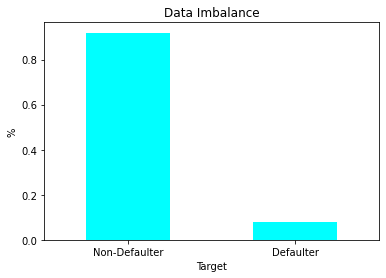

In [358]:
data.TARGET.value_counts(normalize = True).plot.bar(color='cyan')
plt.title("Data Imbalance")
plt.xlabel("Target")
plt.ylabel("%")
plt.xticks((0,1),['Non-Defaulter','Defaulter'],rotation=0)
plt.show()

- 0 : Non-Defaulter | 1 : Defaulter
- 91.93% Clients Paid Installments on time.
- 8.07% Clients Defaulted on Installment Payments.
- Distribution concludes this is Highly Imbalanced Dataset.

### 4.3.1 Spliting 'Data' Dataframe into two Sets :-

- defaulter : 'TARGET' = 1
- non_defaulter : 'TARGET' = 0

In [359]:
defaulter = data [data['TARGET']==1]      # Defaulting Clients
non_defaulter = data [data['TARGET']==0]  # Non-Defaulting Clients

In [360]:
ir = round(len(non_defaulter)/len(defaulter),2)
print('Imbalance Ratio = ',ir)

Imbalance Ratio =  11.39


### 4.4 Univariate Analysis

### 4.4.1 Numerical Columns ( Outliers Analysis )

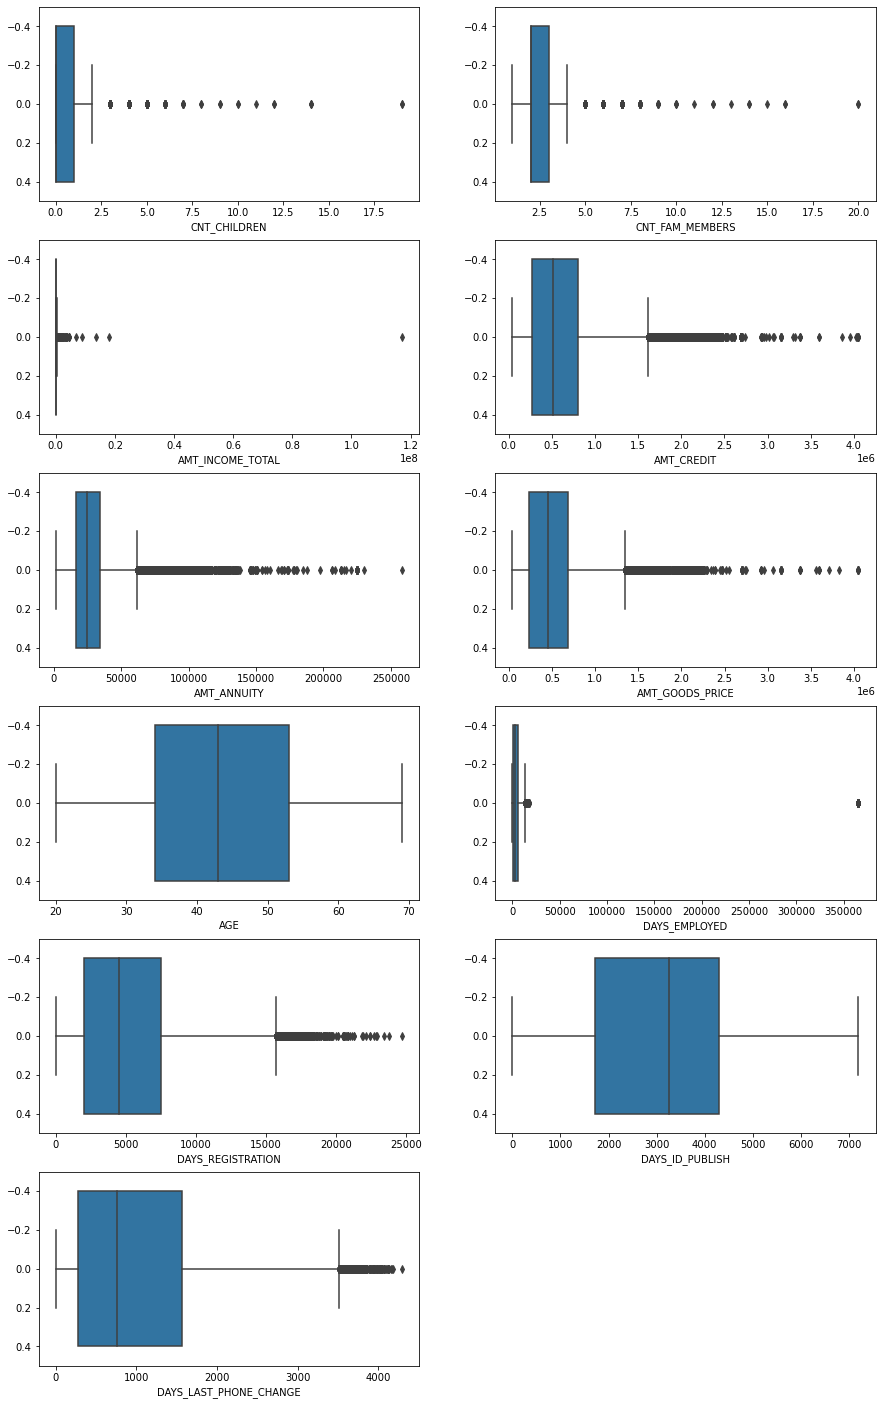

In [361]:
plt.figure(figsize=(15,25))

for i in (enumerate(numerical_cols)):
    plt.subplot(6,2,i[0]+1)
    sns.boxplot(data[i[1]])
    plt.yscale('linear')
plt.show()

### 4.4.1 Insights

- No Outliers in 'AGE' & 'DAYS_ID_PUBLISH' Variables
- Outliers exist in rest Numerical Variables :
-   'CNT_CHILDREN','CNT_FAM_MEMBERS','AMT_INCOME_TOTAL','AMT_CREDIT','AMT_ANNUITY',
    'AMT_GOODS_PRICE','DAYS_EMPLOYED','DAYS_REGISTRATION','DAYS_LAST_PHONE_CHANGE'
- There is a huge difference between the maximum value and the 95th or 99th quantiles, which implies there are outliers in the data set.
- Now, these may well be valid records but considering them may skew our Analysis.

#### 4.4.2 Categorical Columns

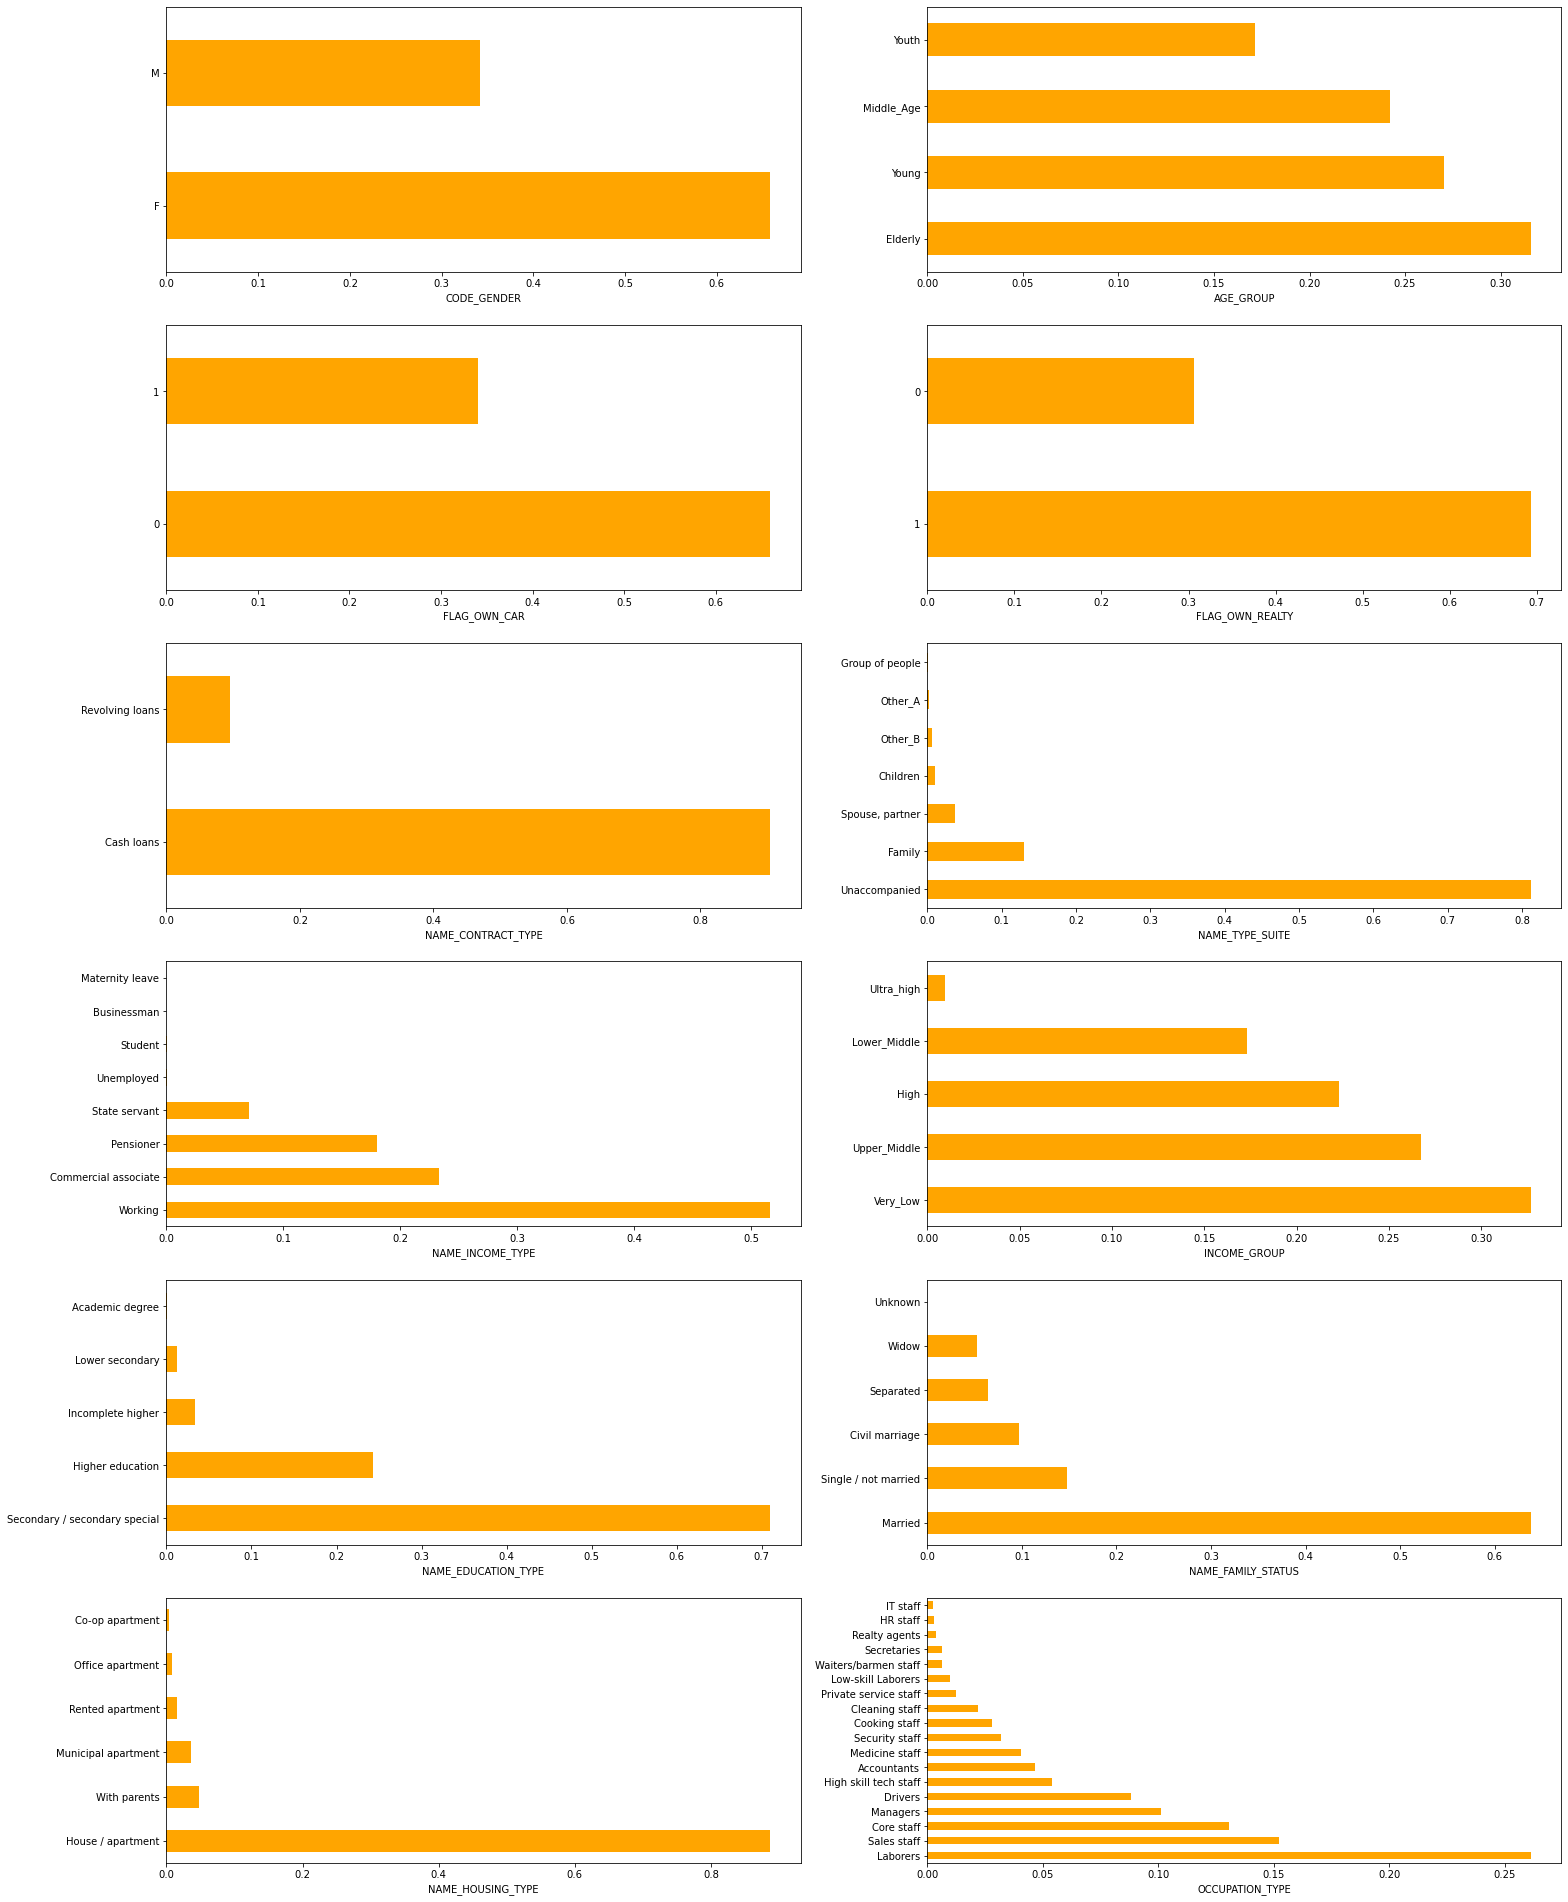

In [362]:
plt.figure(figsize=(25,40))

for i in (enumerate(category_cols)):
    plt.subplot(7,2,i[0]+1)
    data[i[1]].value_counts(normalize=True).plot.barh(color='orange')
    plt.xlabel(i[1])
plt.show()

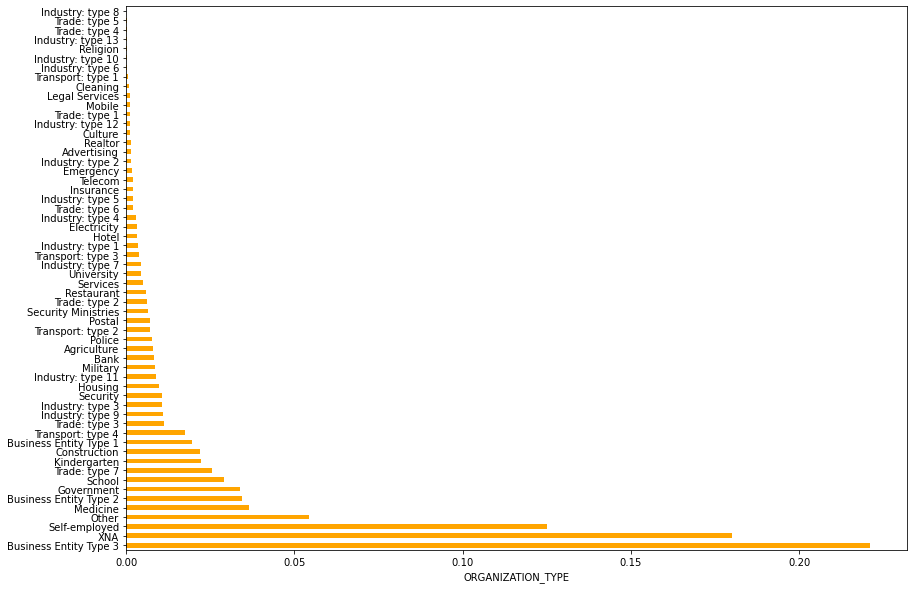

In [363]:
plt.figure(figsize = [14,10])
data.ORGANIZATION_TYPE.value_counts(normalize=True).plot.barh(color='orange')
plt.xlabel('ORGANIZATION_TYPE')
plt.show()

### 4.4.2 Insights

- 'CODE_GENDER'
    - 65.83% Females & 34.16% Males
    - Proportion of Females Applying for Loans is Very High
    ---
- 'AGE_GROUP'
    - Elderly(50+) Group applied for loan most comprising 31.6%, followed by Young(30-40) 27%
    - Youth(18-30) applied least with 17.17%
    ---
- 'FLAG_OWN_CAR'
    - 65.98% Clients don't own Car
    - 34% Clients Own Car
    - Proportion of Clients not Owning Car is Very High
    ---
- 'FLAG_OWN_REALTY'
    - 69.36% Clients Own House
    - 30.63% Clients dont Own House
    - Proportion of clients Owning House is Very High
    ---
- 'NAME_CONTRACT_TYPE'
    - 90.47% Clients applied for Cash Loans
    - 9.52% Clients applied for Revolving loans
    - Majority of Clients applied for Cash Loans
    ---
- 'NAME_TYPE_SUITE'
    - 81.23% of Clients were Unaccompanied
    - Clients accompanied by Spouse & Children were 3.7% % 1%
    - Majority of Clients were Unaccompanied while applying for loan
    ---
- 'NAME_INCOME_TYPE'
    - 51.63% Clients are Working Class, followed by Commercial associate (23.3%) & Pensioner (18%)
    - Unemployed,Students,Businessmen & on Maternity leave Clients applied least
    ---
- 'INCOME_GROUP'
    - Very Low Income Clients applied most (32.7%), followed by Upper Middle Class (26.73%) & High Income Group (22.28%)
    - Only 1% Ultra Rich applied for loan
    ---
- 'NAME_EDUCATION_TYPE'
    - 71% of Clients had Secondary Education, followed by  Clients with Higher education 24.34%
    - Clients with Incomplete / Lower secondary or having Academic degree applied least
    ---
- 'NAME_FAMILY_STATUS'
    - 63.87% Clients applying for Loan were Married,followed by Single (14.77%)
    - Separated / Widow Clients applied least
    ---
- 'NAME_HOUSING_TYPE'
    - Majority of Clients (88.73%) stayed in own House
    ---
- 'OCCUPATION_TYPE'
    - 26.14% Clients are Laborers, followed by Sales/Core Staff 15.2% & 13% respectively
    - IT / HR Staff least applied for loan
    ---
- 'ORGANIZATION_TYPE'
    - Bussiness Entities (Type 3) comprised 22.11%, followed by Self-employed (12.5%)
    ---

### 4.5 Segmented Univariate Analysis

#### 4.5.1 Categorical Columns w.r.t Target Variable

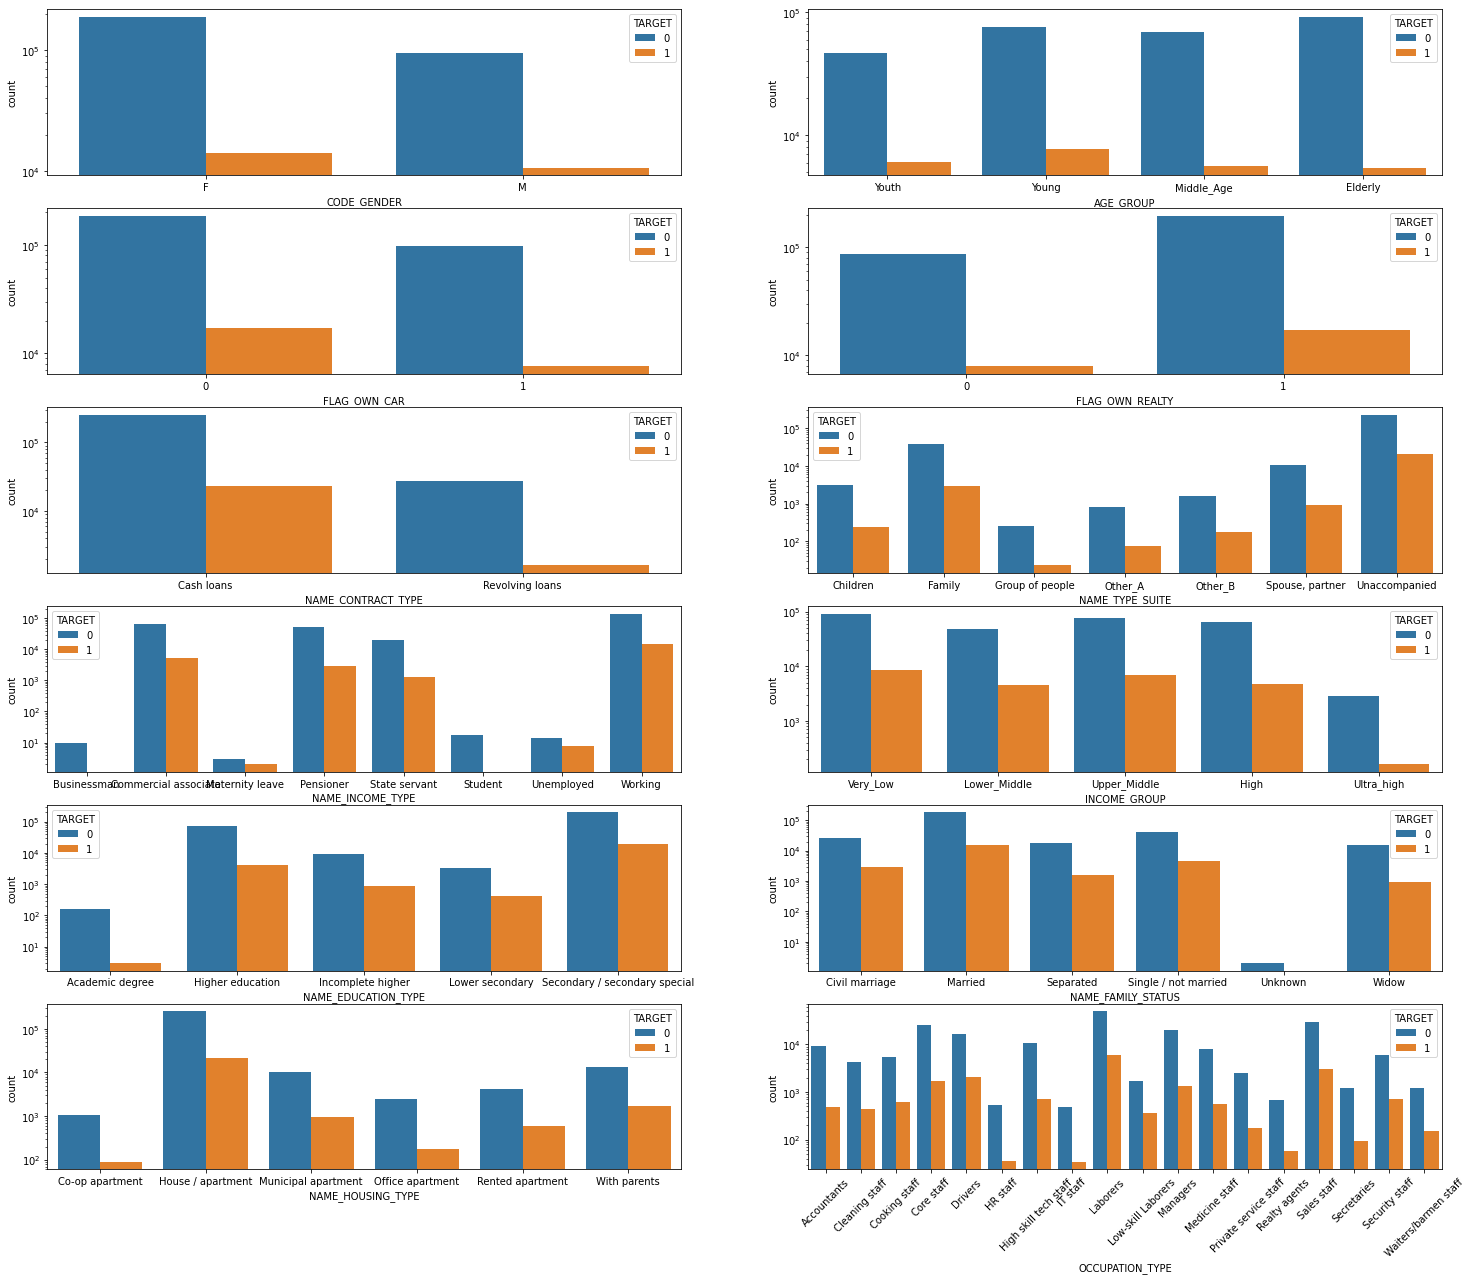

In [364]:
plt.figure(figsize=(25,25))

for i in (enumerate(category_cols)):
    plt.subplot(7,2,i[0]+1)
    sns.countplot(x=i[1],hue='TARGET',data=data)
    if i[0] == 11:
        plt.xticks(rotation=45)
    plt.yscale('log')
plt.show()

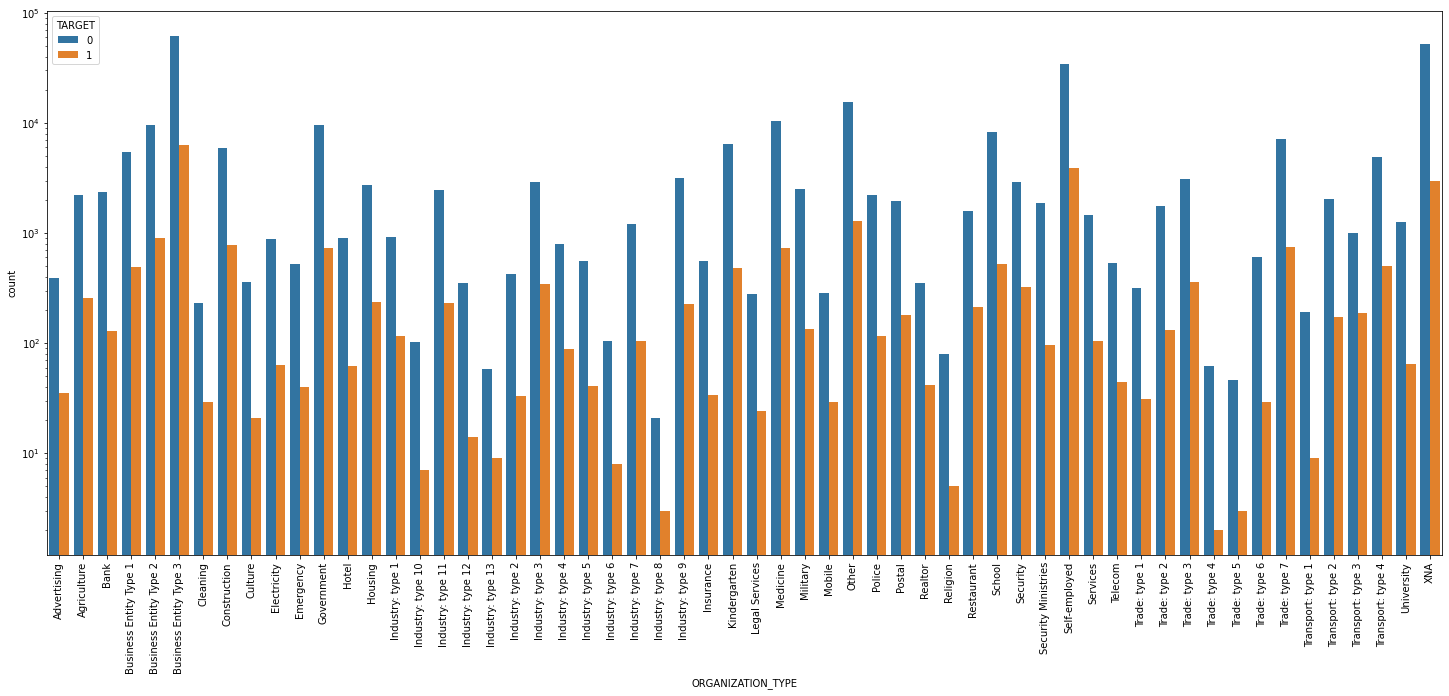

In [365]:
plt.figure(figsize=(25,10))

sns.countplot(x='ORGANIZATION_TYPE',hue='TARGET',data=data)
plt.xticks(rotation=90)
plt.yscale('log')
plt.show()

### 4.5.1 Insights

- 'CODE_GENDER'
    - Proportion of Females Applying for Loans & Defaulting is High compared to Males
    ---
- 'AGE_GROUP'
    - Elderly are taking most loans, but least likely to Default. Its reasonable since they might be having high savings
    - Young(30-40) come second, but they're most likely to Default
    ---
- 'FLAG_OWN_CAR'
    - Proportion of Clients not Owning Car & Defaulting is High
    - Proportion of Clients  Owning Car & Defaulting is Low
    ---
- 'FLAG_OWN_REALTY'
    - Proportion of clients Owning House & Defaulting is Very High
    - Proportion of clients Not Owning House & Defaulting is Low
    ---
- 'NAME_CONTRACT_TYPE'
    - Majority of Clients applied for Cash Loans & Defaulting rate is very High
    - Clients applying for Revolving loans & Defaulting is Low
    ---
- 'NAME_TYPE_SUITE'
    - Default Rate amongst Unaccompained Clients is very High
    - Default Rate amongst Clients Accompained by Group of People is very Low
    ---
- 'NAME_INCOME_TYPE'
    - 51.63% Clients are Working Class, followed by Commercial associate (23.3%) & Pensioner (18%)
    - Unemployed,Students,Businessmen & on Maternity leave Clients applied least
    - Very High Default Rate amongst Working Class, Commercial associates, Pensioners, on Maternity leave & Unemployed Class
    - Default Rate amongst Bussinessmen & Students is very Low
    ---
- 'INCOME_GROUP'
    - Default Rate in Ultra High Income Group is Very Low
    ---
- 'NAME_EDUCATION_TYPE'
    - Default Rate amomgst Secondary & Incomplete Education is very High
    - Default Rate amongst Academic Degree holders is Very Low
    ---
- 'NAME_FAMILY_STATUS'
    -  Very High Default Rate amongst Married Clients
    ---
- 'NAME_HOUSING_TYPE'
    - Default Rate amongst Clients staying in their own House or with Parents is Very High
    - Default Rate amongst Clients staying in Office or Co-Op Appartments is Very Low
    ---
- 'OCCUPATION_TYPE'
    - - Default Rate amongst Laborers & Sales Staff is very High
    - Default Rate amongst IT & HR Staff is very Low
    ---
- 'ORGANIZATION_TYPE'
    - Default Rate amongst Bussiness Entities (Type 3) & Self-employed is very High
    - Default Rate amongst Trade & Industry Type Occupations is Low
    ---

#### 4.5.2 Numerical Columns w.r.t Target Variable

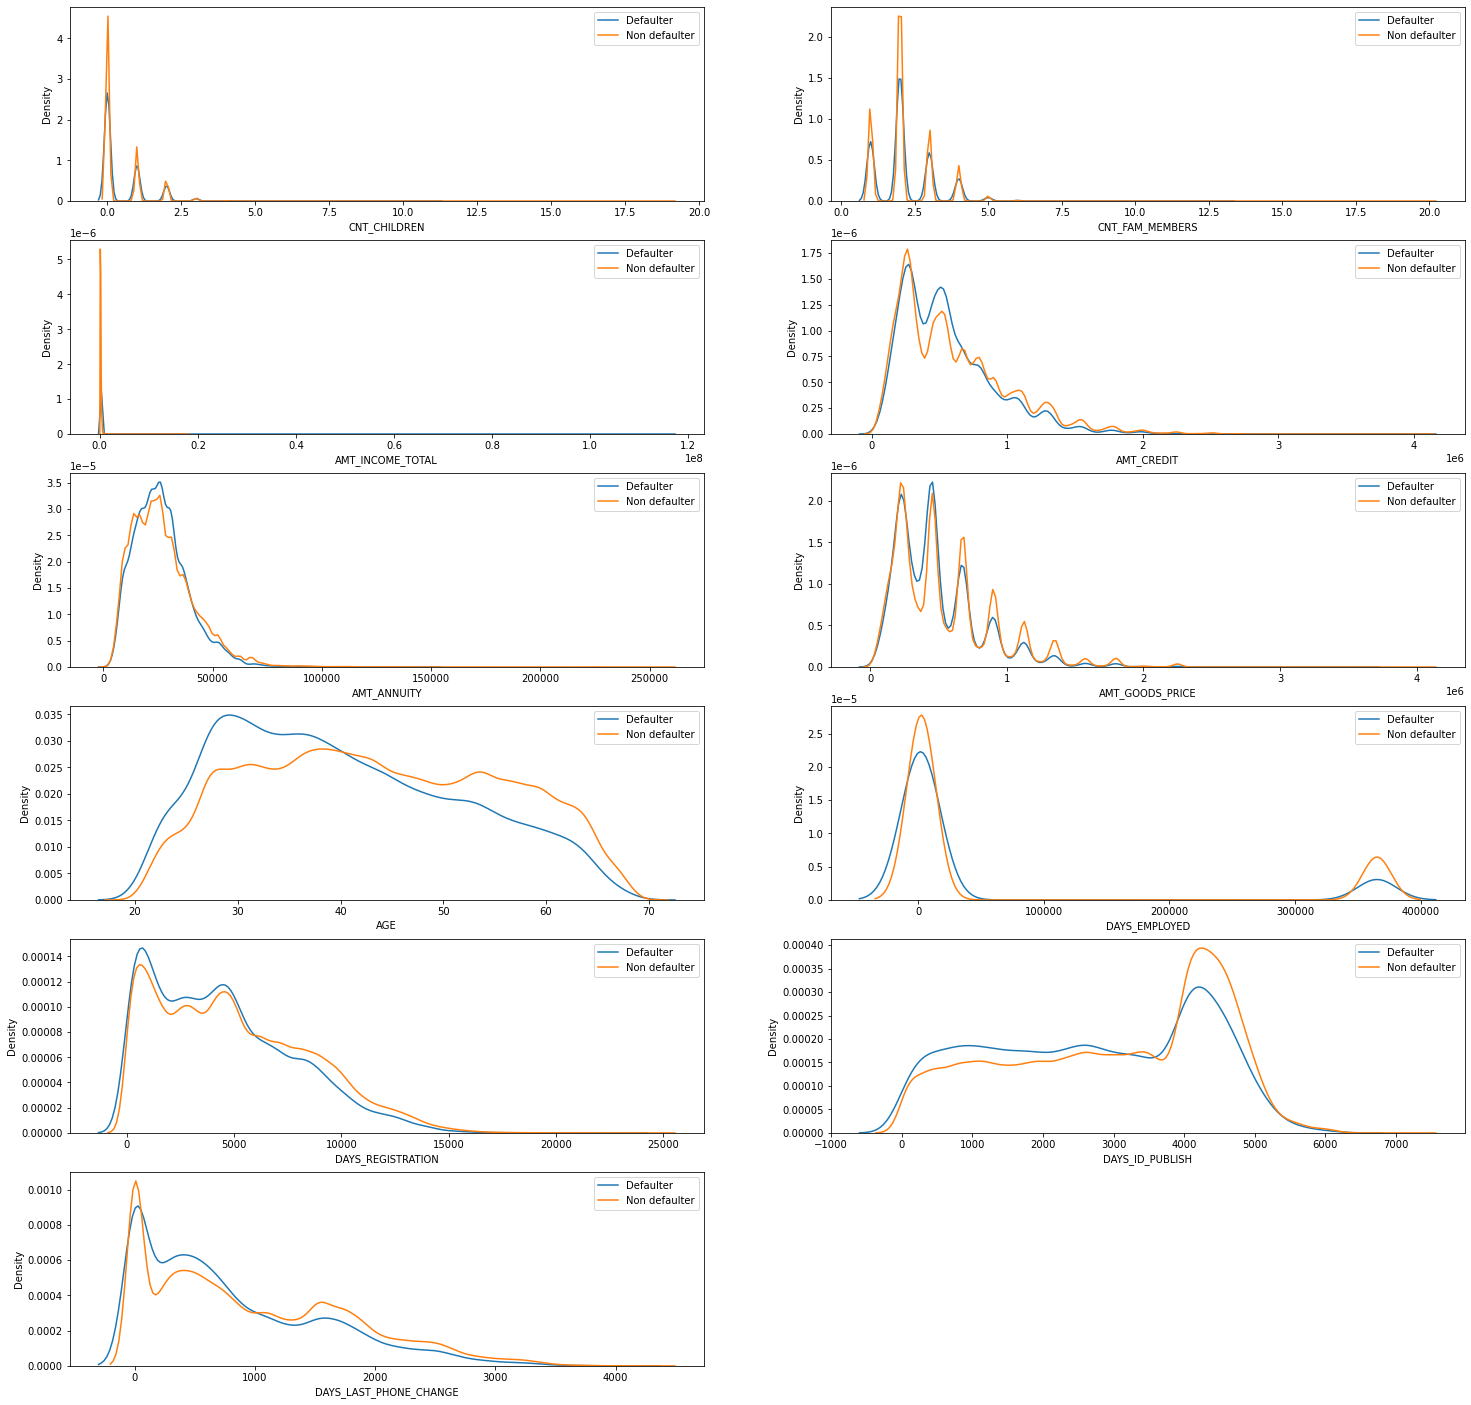

In [366]:
plt.figure(figsize=(25,25))
for i in (enumerate(numerical_cols)):
    plt.subplot(6,2,i[0]+1)
    sns.distplot(defaulter[i[1]], hist=False, label='Defaulter')
    sns.distplot(non_defaulter[i[1]], hist=False, label='Non defaulter')
    plt.legend()
plt.show()

#### Boxplots w.r.t. Target Variable

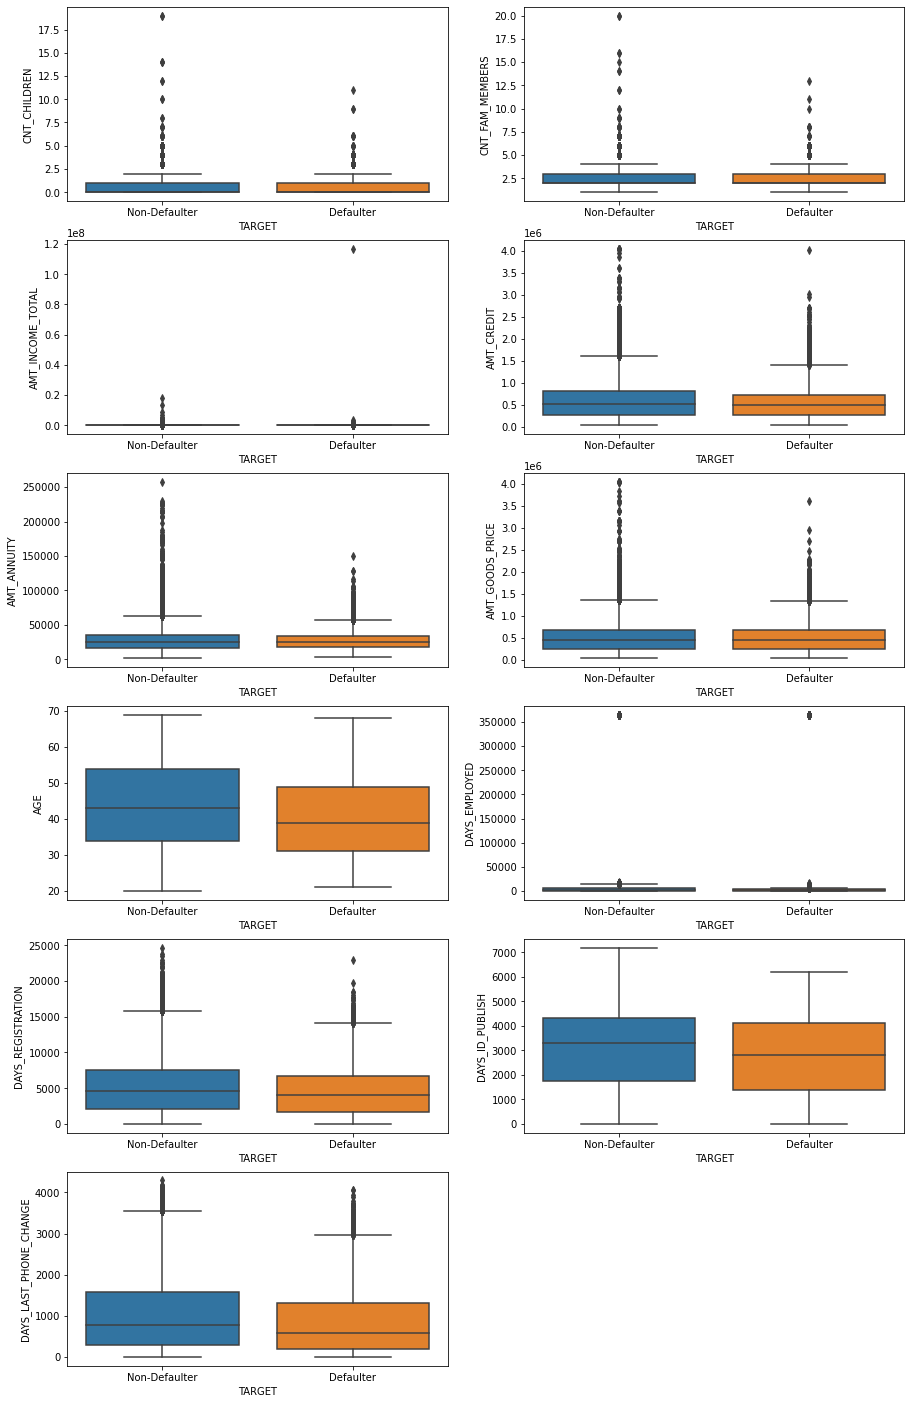

In [367]:
plt.figure(figsize=(15,25))
for i in (enumerate(numerical_cols)):
    plt.subplot(6,2,i[0]+1)
    sns.boxplot(x='TARGET',y=data[i[1]],data=data)
    plt.xticks((0,1),['Non-Defaulter','Defaulter'])
    plt.yscale('linear')
plt.show()

### 4.5.2 Insights

- Most Numerical Variables follow same Distribution & Pattern across Defaulters & Non Defaulters Groups
- Median Age of Defaulting Clients is lower compared to Non Defaulting Clients
- Medain of 'DAYS_EMPLOYED','DAYS_REGISTRATION','DAYS_ID_PUBLISH' & 'DAYS_LAST_PHONE_CHANGE' is Lower in Defaulting Clients
- Defaulting clients Change their Identity Document, Registration & Phone little sooner before application
- Defaulting clients started application little early in current employment
---

### 4.7 Top 10 correlation w.r.t Target variable

### 4.7.1 Non Defaulting Clients ( Target = 0 )

##### - Negative Correlations Included

In [368]:
corr = non_defaulter[numerical_cols].corr(method = 'pearson')
corr = corr.where(np.triu(np.ones(corr.shape),k=1).astype(np.bool))

top10_corr0 = corr.unstack().reset_index()
top10_corr0.columns = ['VAR_1','VAR_2','CORRELATION']

top10_corr0.dropna(subset=['CORRELATION'],inplace=True)
top10_corr0['CORR_ABS'] = top10_corr0['CORRELATION'].abs()
top10_corr0.sort_values('CORR_ABS', ascending=False).head(10)

,VAR_1,VAR_2,CORRELATION,CORR_ABS
58,AMT_GOODS_PRICE,AMT_CREDIT,0.987021,0.987021
11,CNT_FAM_MEMBERS,CNT_CHILDREN,0.878571,0.878571
59,AMT_GOODS_PRICE,AMT_ANNUITY,0.776422,0.776422
47,AMT_ANNUITY,AMT_CREDIT,0.771298,0.771298
83,DAYS_EMPLOYED,AGE,0.626029,0.626029
46,AMT_ANNUITY,AMT_INCOME_TOTAL,0.418948,0.418948
57,AMT_GOODS_PRICE,AMT_INCOME_TOTAL,0.349426,0.349426
35,AMT_CREDIT,AMT_INCOME_TOTAL,0.342799,0.342799
66,AGE,CNT_CHILDREN,-0.336913,0.336913
94,DAYS_REGISTRATION,AGE,0.333026,0.333026


#### - Negative Correlations Excluded

In [369]:
corr = non_defaulter[numerical_cols].corr(method = 'pearson')
corr = corr.where(np.triu(np.ones(corr.shape),k=1).astype(np.bool))

top10_corr0 = corr.unstack().reset_index()
top10_corr0.columns = ['VAR_1','VAR_2','CORRELATION']

top10_corr0.dropna(subset=['CORRELATION'],inplace=True)
top10_corr0.sort_values('CORRELATION', ascending=False).head(10)

,VAR_1,VAR_2,CORRELATION
58,AMT_GOODS_PRICE,AMT_CREDIT,0.987021
11,CNT_FAM_MEMBERS,CNT_CHILDREN,0.878571
59,AMT_GOODS_PRICE,AMT_ANNUITY,0.776422
47,AMT_ANNUITY,AMT_CREDIT,0.771298
83,DAYS_EMPLOYED,AGE,0.626029
46,AMT_ANNUITY,AMT_INCOME_TOTAL,0.418948
57,AMT_GOODS_PRICE,AMT_INCOME_TOTAL,0.349426
35,AMT_CREDIT,AMT_INCOME_TOTAL,0.342799
94,DAYS_REGISTRATION,AGE,0.333026
106,DAYS_ID_PUBLISH,DAYS_EMPLOYED,0.276662


### 4.7.2 Defaulting Clients ( Target = 1 )

- Negative Correlations Included

In [370]:
corr = defaulter[numerical_cols].corr(method = 'pearson')
corr = corr.where(np.triu(np.ones(corr.shape),k=1).astype(np.bool))

top10_corr0 = corr.unstack().reset_index()
top10_corr0.columns = ['VAR_1','VAR_2','CORRELATION']

top10_corr0.dropna(subset=['CORRELATION'],inplace=True)
top10_corr0['CORR_ABS'] = top10_corr0['CORRELATION'].abs()
top10_corr0.sort_values('CORR_ABS', ascending=False).head(10)

,VAR_1,VAR_2,CORRELATION,CORR_ABS
58,AMT_GOODS_PRICE,AMT_CREDIT,0.982783,0.982783
11,CNT_FAM_MEMBERS,CNT_CHILDREN,0.885484,0.885484
59,AMT_GOODS_PRICE,AMT_ANNUITY,0.752295,0.752295
47,AMT_ANNUITY,AMT_CREDIT,0.752195,0.752195
83,DAYS_EMPLOYED,AGE,0.582441,0.582441
94,DAYS_REGISTRATION,AGE,0.289116,0.289116
66,AGE,CNT_CHILDREN,-0.259222,0.259222
105,DAYS_ID_PUBLISH,AGE,0.252256,0.252256
106,DAYS_ID_PUBLISH,DAYS_EMPLOYED,0.229090,0.229090
67,AGE,CNT_FAM_MEMBERS,-0.203403,0.203403


- Negative Correlations Excluded

In [371]:
corr = defaulter[numerical_cols].corr(method = 'pearson')
corr = corr.where(np.triu(np.ones(corr.shape),k=1).astype(np.bool))

top10_corr0 = corr.unstack().reset_index()
top10_corr0.columns = ['VAR_1','VAR_2','CORRELATION']

top10_corr0.dropna(subset=['CORRELATION'],inplace=True)
top10_corr0.sort_values('CORRELATION', ascending=False).head(10)

,VAR_1,VAR_2,CORRELATION
58,AMT_GOODS_PRICE,AMT_CREDIT,0.982783
11,CNT_FAM_MEMBERS,CNT_CHILDREN,0.885484
59,AMT_GOODS_PRICE,AMT_ANNUITY,0.752295
47,AMT_ANNUITY,AMT_CREDIT,0.752195
83,DAYS_EMPLOYED,AGE,0.582441
94,DAYS_REGISTRATION,AGE,0.289116
105,DAYS_ID_PUBLISH,AGE,0.252256
106,DAYS_ID_PUBLISH,DAYS_EMPLOYED,0.229090
95,DAYS_REGISTRATION,DAYS_EMPLOYED,0.192455
71,AGE,AMT_GOODS_PRICE,0.135532


### 4.8 Correlation Insights

- Top 5 Correlation Variables are Same for both :
    - AMT_GOODS_PRICE  &  AMT_CREDIT
    - CNT_FAM_MEMBERS  &  CNT_CHILDREN
    - AMT_GOODS_PRICE  &  AMT_ANNUITY
    - AMT_ANNUITY  &  AMT_CREDIT
    - DAYS_EMPLOYED	 &  AGE
- There is Inverse Correlation between :
    - Client's Age & Number of Children
    - Client's Age & Number of Family Member
- For Non Defaulting Clients, High Correlation in AMT_ANNUITY  &  AMT_INCOME_TOTAL
---

### > Variables with Highest Correlation are the same in both Defaulting & Non Defaulting Clients

### 4.9 Bivariate Analysis

#### 4.9.1 EDUCATION_TYPE, GENDER with TARGET

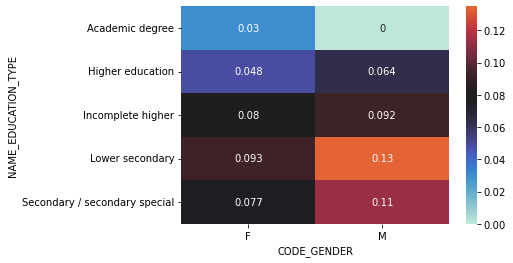

In [372]:
result = pd.pivot_table(data=data, index='NAME_EDUCATION_TYPE', columns='CODE_GENDER', values='TARGET')
sns.heatmap(result,annot=True,center=.08)
plt.show()

- Lower Secondary Educated are Defaulting Very much
- Academic Degree Holders are Defaulting Very Less

#### 4.9.2 Car & House Ownership with TARGET

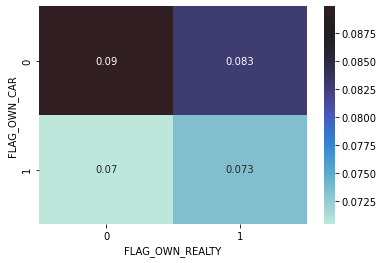

In [373]:
result = pd.pivot_table(data=data, index='FLAG_OWN_CAR', columns='FLAG_OWN_REALTY', values='TARGET')
sns.heatmap(result,annot=True,center=.088)
plt.show()

- Default Rate in Clients Not Owning Car & House is very High
- Default Rate in Clients Owning Car & Not Owning House is Low

#### 4.9.3 INCOME_GROUP & AGE_GROUP with TARGET

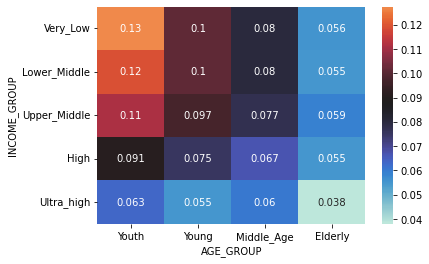

In [374]:
result = pd.pivot_table(data=data, index='INCOME_GROUP', columns='AGE_GROUP', values='TARGET')
sns.heatmap(result,annot=True,center=.088)
plt.show()

- Default rate in Low Income Youth is very High
- Default Rate in Ultra Rich Elderly is Very Low

#### 4.9.4 EDUCATION_TYPE & INCOME_GROUP with TARGET

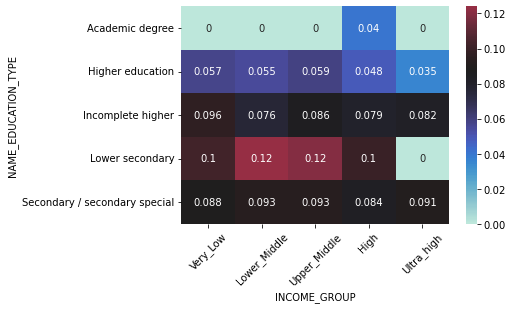

In [375]:
result = pd.pivot_table(data=data, index='NAME_EDUCATION_TYPE', columns='INCOME_GROUP', values='TARGET')
sns.heatmap(result,annot=True,center=.088)
plt.xticks(rotation=45)
plt.show()

- Very High Default Rate in Low Income Class with Lower Secondary Education
- Very Low Default Rate in Clients having Academic Degree

### 4.9 Insights :

- Clients with Lower Secondary Education must be Avoided & Academic Degree Holder Clients must be Targeted
- Clients Not Owning Car & House must be Avoided. Clients Owning Car & Not Owning House must be Targeted
- Low Income Youth must be Avoided & Ultra Rich Elderly must be Targeted

---

## 5. Import & Read 'Previous Application' Dataset

In [376]:
prev_data = pd.read_csv("previous_application.csv")
prev_data.head()

,SK_ID_PREV,SK_ID_CURR,NAME_CONTRACT_TYPE,AMT_ANNUITY,AMT_APPLICATION,AMT_CREDIT,AMT_DOWN_PAYMENT,AMT_GOODS_PRICE,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,FLAG_LAST_APPL_PER_CONTRACT,NFLAG_LAST_APPL_IN_DAY,RATE_DOWN_PAYMENT,RATE_INTEREST_PRIMARY,RATE_INTEREST_PRIVILEGED,NAME_CASH_LOAN_PURPOSE,NAME_CONTRACT_STATUS,DAYS_DECISION,NAME_PAYMENT_TYPE,CODE_REJECT_REASON,NAME_TYPE_SUITE,NAME_CLIENT_TYPE,NAME_GOODS_CATEGORY,NAME_PORTFOLIO,NAME_PRODUCT_TYPE,CHANNEL_TYPE,SELLERPLACE_AREA,NAME_SELLER_INDUSTRY,CNT_PAYMENT,NAME_YIELD_GROUP,PRODUCT_COMBINATION,DAYS_FIRST_DRAWING,DAYS_FIRST_DUE,DAYS_LAST_DUE_1ST_VERSION,DAYS_LAST_DUE,DAYS_TERMINATION,NFLAG_INSURED_ON_APPROVAL
0,2030495,271877,Consumer loans,1730.430,17145.0,17145.0,0.0,17145.0,SATURDAY,15,Y,1,0.0,0.182832,0.867336,XAP,Approved,-73,Cash through the bank,XAP,NaN,Repeater,Mobile,POS,XNA,Country-wide,35,Connectivity,12.0,middle,POS mobile with interest,365243.0,-42.0,300.0,-42.0,-37.0,0.0
1,2802425,108129,Cash loans,25188.615,607500.0,679671.0,NaN,607500.0,THURSDAY,11,Y,1,NaN,NaN,NaN,XNA,Approved,-164,XNA,XAP,Unaccompanied,Repeater,XNA,Cash,x-sell,Contact center,-1,XNA,36.0,low_action,Cash X-Sell: low,365243.0,-134.0,916.0,365243.0,365243.0,1.0
2,2523466,122040,Cash loans,15060.735,112500.0,136444.5,NaN,112500.0,TUESDAY,11,Y,1,NaN,NaN,NaN,XNA,Approved,-301,Cash through the bank,XAP,"Spouse, partner",Repeater,XNA,Cash,x-sell,Credit and cash offices,-1,XNA,12.0,high,Cash X-Sell: high,365243.0,-271.0,59.0,365243.0,365243.0,1.0
3,2819243,176158,Cash loans,47041.335,450000.0,470790.0,NaN,450000.0,MONDAY,7,Y,1,NaN,NaN,NaN,XNA,Approved,-512,Cash through the bank,XAP,NaN,Repeater,XNA,Cash,x-sell,Credit and cash offices,-1,XNA,12.0,middle,Cash X-Sell: middle,365243.0,-482.0,-152.0,-182.0,-177.0,1.0
4,1784265,202054,Cash loans,31924.395,337500.0,404055.0,NaN,337500.0,THURSDAY,9,Y,1,NaN,NaN,NaN,Repairs,Refused,-781,Cash through the bank,HC,NaN,Repeater,XNA,Cash,walk-in,Credit and cash offices,-1,XNA,24.0,high,Cash Street: high,NaN,NaN,NaN,NaN,NaN,NaN


In [377]:
prev_data.shape

(1670214, 37)

- Number of Rows : 1670214
- Number of Columns : 37

#### Information about the DataFrame

In [378]:
prev_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1670214 entries, 0 to 1670213
Data columns (total 37 columns):
 #   Column                       Non-Null Count    Dtype  
---  ------                       --------------    -----  
 0   SK_ID_PREV                   1670214 non-null  int64  
 1   SK_ID_CURR                   1670214 non-null  int64  
 2   NAME_CONTRACT_TYPE           1670214 non-null  object 
 3   AMT_ANNUITY                  1297979 non-null  float64
 4   AMT_APPLICATION              1670214 non-null  float64
 5   AMT_CREDIT                   1670213 non-null  float64
 6   AMT_DOWN_PAYMENT             774370 non-null   float64
 7   AMT_GOODS_PRICE              1284699 non-null  float64
 8   WEEKDAY_APPR_PROCESS_START   1670214 non-null  object 
 9   HOUR_APPR_PROCESS_START      1670214 non-null  int64  
 10  FLAG_LAST_APPL_PER_CONTRACT  1670214 non-null  object 
 11  NFLAG_LAST_APPL_IN_DAY       1670214 non-null  int64  
 12  RATE_DOWN_PAYMENT            774370 non-nu

#### Summary Statistics for Numerical Columns

In [379]:
prev_data.describe(include='all')

,SK_ID_PREV,SK_ID_CURR,NAME_CONTRACT_TYPE,AMT_ANNUITY,AMT_APPLICATION,AMT_CREDIT,AMT_DOWN_PAYMENT,AMT_GOODS_PRICE,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,FLAG_LAST_APPL_PER_CONTRACT,NFLAG_LAST_APPL_IN_DAY,RATE_DOWN_PAYMENT,RATE_INTEREST_PRIMARY,RATE_INTEREST_PRIVILEGED,NAME_CASH_LOAN_PURPOSE,NAME_CONTRACT_STATUS,DAYS_DECISION,NAME_PAYMENT_TYPE,CODE_REJECT_REASON,NAME_TYPE_SUITE,NAME_CLIENT_TYPE,NAME_GOODS_CATEGORY,NAME_PORTFOLIO,NAME_PRODUCT_TYPE,CHANNEL_TYPE,SELLERPLACE_AREA,NAME_SELLER_INDUSTRY,CNT_PAYMENT,NAME_YIELD_GROUP,PRODUCT_COMBINATION,DAYS_FIRST_DRAWING,DAYS_FIRST_DUE,DAYS_LAST_DUE_1ST_VERSION,DAYS_LAST_DUE,DAYS_TERMINATION,NFLAG_INSURED_ON_APPROVAL
count,1.670214e+06,1.670214e+06,1670214,1.297979e+06,1.670214e+06,1.670213e+06,7.743700e+05,1.284699e+06,1670214,1.670214e+06,1670214,1.670214e+06,774370.000000,5951.000000,5951.000000,1670214,1670214,1.670214e+06,1670214,1670214,849809,1670214,1670214,1670214,1670214,1670214,1.670214e+06,1670214,1.297984e+06,1670214,1669868,997149.000000,997149.000000,997149.000000,997149.000000,997149.000000,997149.000000
unique,NaN,NaN,4,NaN,NaN,NaN,NaN,NaN,7,NaN,2,NaN,NaN,NaN,NaN,25,4,NaN,4,9,7,4,28,5,3,8,NaN,11,NaN,5,17,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,NaN,Cash loans,NaN,NaN,NaN,NaN,NaN,TUESDAY,NaN,Y,NaN,NaN,NaN,NaN,XAP,Approved,NaN,Cash through the bank,XAP,Unaccompanied,Repeater,XNA,POS,XNA,Credit and cash offices,NaN,XNA,NaN,XNA,Cash,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,NaN,747553,NaN,NaN,NaN,NaN,NaN,255118,NaN,1661739,NaN,NaN,NaN,NaN,922661,1036781,NaN,1033552,1353093,508970,1231261,950809,691011,1063666,719968,NaN,855720,NaN,517215,285990,NaN,NaN,NaN,NaN,NaN,NaN
mean,1.923089e+06,2.783572e+05,NaN,1.595512e+04,1.752339e+05,1.961140e+05,6.697402e+03,2.278473e+05,NaN,1.248418e+01,NaN,9.964675e-01,0.079637,0.188357,0.773503,NaN,NaN,-8.806797e+02,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.139511e+02,NaN,1.605408e+01,NaN,NaN,342209.855039,13826.269337,33767.774054,76582.403064,81992.343838,0.332570
std,5.325980e+05,1.028148e+05,NaN,1.478214e+04,2.927798e+05,3.185746e+05,2.092150e+04,3.153966e+05,NaN,3.334028e+00,NaN,5.932963e-02,0.107823,0.087671,0.100879,NaN,NaN,7.790997e+02,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7.127443e+03,NaN,1.456729e+01,NaN,NaN,88916.115834,72444.869708,106857.034789,149647.415123,153303.516729,0.471134
min,1.000001e+06,1.000010e+05,NaN,0.000000e+00,0.000000e+00,0.000000e+00,-9.000000e-01,0.000000e+00,NaN,0.000000e+00,NaN,0.000000e+00,-0.000015,0.034781,0.373150,NaN,NaN,-2.922000e+03,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-1.000000e+00,NaN,0.000000e+00,NaN,NaN,-2922.000000,-2892.000000,-2801.000000,-2889.000000,-2874.000000,0.000000
25%,1.461857e+06,1.893290e+05,NaN,6.321780e+03,1.872000e+04,2.416050e+04,0.000000e+00,5.084100e+04,NaN,1.000000e+01,NaN,1.000000e+00,0.000000,0.160716,0.715645,NaN,NaN,-1.300000e+03,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-1.000000e+00,NaN,6.000000e+00,NaN,NaN,365243.000000,-1628.000000,-1242.000000,-1314.000000,-1270.000000,0.000000
50%,1.923110e+06,2.787145e+05,NaN,1.125000e+04,7.104600e+04,8.054100e+04,1.638000e+03,1.123200e+05,NaN,1.200000e+01,NaN,1.000000e+00,0.051605,0.189122,0.835095,NaN,NaN,-5.810000e+02,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.000000e+00,NaN,1.200000e+01,NaN,NaN,365243.000000,-831.000000,-361.000000,-537.000000,-499.000000,0.000000
75%,2.384280e+06,3.675140e+05,NaN,2.065842e+04,1.803600e+05,2.164185e+05,7.740000e+03,2.340000e+05,NaN,1.500000e+01,NaN,1.000000e+00,0.108909,0.193330,0.852537,NaN,NaN,-2.800000e+02,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.200000e+01,NaN,2.400000e+01,NaN,NaN,365243.000000,-411.000000,129.000000,-74.000000,-44.000000,1.000000


### 5.1 Finding % of Missing Values for all Columns/Variables

In [380]:
prev_data.isnull().mean().sort_values(ascending=False)*100

RATE_INTEREST_PRIVILEGED       99.643698
RATE_INTEREST_PRIMARY          99.643698
AMT_DOWN_PAYMENT               53.636480
RATE_DOWN_PAYMENT              53.636480
NAME_TYPE_SUITE                49.119754
NFLAG_INSURED_ON_APPROVAL      40.298129
DAYS_TERMINATION               40.298129
DAYS_LAST_DUE                  40.298129
DAYS_LAST_DUE_1ST_VERSION      40.298129
DAYS_FIRST_DUE                 40.298129
DAYS_FIRST_DRAWING             40.298129
AMT_GOODS_PRICE                23.081773
AMT_ANNUITY                    22.286665
CNT_PAYMENT                    22.286366
PRODUCT_COMBINATION             0.020716
AMT_CREDIT                      0.000060
NAME_YIELD_GROUP                0.000000
NAME_PORTFOLIO                  0.000000
NAME_SELLER_INDUSTRY            0.000000
SELLERPLACE_AREA                0.000000
CHANNEL_TYPE                    0.000000
NAME_PRODUCT_TYPE               0.000000
SK_ID_PREV                      0.000000
NAME_GOODS_CATEGORY             0.000000
NAME_CLIENT_TYPE

### 5.2 Removing columns with Missing Values more than 40%

In [381]:
prev_data = prev_data.loc[:,(prev_data.isnull().mean()*100 <=40)]
prev_data.shape

(1670214, 26)

### 5.3 Handling Missing Values

- Imputing Missing Values with Median as all are Numerical Columns

In [382]:
prev_missing = ['AMT_GOODS_PRICE','AMT_ANNUITY','CNT_PAYMENT']
for i in prev_missing:
    prev_data[i].fillna(prev_data[i].median(), inplace = True)
#prev_data.isnull().sum()
prev_data.isnull().mean().sort_values(ascending=False)*100

PRODUCT_COMBINATION            0.020716
AMT_CREDIT                     0.000060
NAME_PAYMENT_TYPE              0.000000
NAME_YIELD_GROUP               0.000000
CNT_PAYMENT                    0.000000
NAME_SELLER_INDUSTRY           0.000000
SELLERPLACE_AREA               0.000000
CHANNEL_TYPE                   0.000000
NAME_PRODUCT_TYPE              0.000000
NAME_PORTFOLIO                 0.000000
NAME_GOODS_CATEGORY            0.000000
NAME_CLIENT_TYPE               0.000000
CODE_REJECT_REASON             0.000000
SK_ID_PREV                     0.000000
SK_ID_CURR                     0.000000
NAME_CONTRACT_STATUS           0.000000
NAME_CASH_LOAN_PURPOSE         0.000000
NFLAG_LAST_APPL_IN_DAY         0.000000
FLAG_LAST_APPL_PER_CONTRACT    0.000000
HOUR_APPR_PROCESS_START        0.000000
WEEKDAY_APPR_PROCESS_START     0.000000
AMT_GOODS_PRICE                0.000000
AMT_APPLICATION                0.000000
AMT_ANNUITY                    0.000000
NAME_CONTRACT_TYPE             0.000000


#### Imputing 'XNA' with 'Cash through the bank' in NAME_PAYMENT_TYPE Column

In [383]:
prev_data.NAME_PAYMENT_TYPE.value_counts()

Cash through the bank                        1033552
XNA                                           627384
Non-cash from your account                      8193
Cashless from the account of the employer       1085
Name: NAME_PAYMENT_TYPE, dtype: int64

In [384]:
prev_data.NAME_PAYMENT_TYPE.replace('XNA', 'Cash through the bank',inplace = True)
prev_data.NAME_PAYMENT_TYPE.value_counts()

Cash through the bank                        1660936
Non-cash from your account                      8193
Cashless from the account of the employer       1085
Name: NAME_PAYMENT_TYPE, dtype: int64

#### 5.4 Converting DAYS_DECISION TO YEARS_DECISION

In [387]:
prev_data.DAYS_DECISION.describe()

count    1.670214e+06
mean    -8.806797e+02
std      7.790997e+02
min     -2.922000e+03
25%     -1.300000e+03
50%     -5.810000e+02
75%     -2.800000e+02
max     -1.000000e+00
Name: DAYS_DECISION, dtype: float64

In [388]:
prev_data.columns.get_loc('DAYS_DECISION')

13

In [389]:
prev_data.DAYS_DECISION = prev_data.DAYS_DECISION.abs()
prev_data.insert(13,'YEARS_DECISION',prev_data['DAYS_DECISION']//365)
prev_data.drop(labels = 'DAYS_DECISION', axis=1, inplace = True)

prev_data['YEARS_DECISION'].head()

0    0
1    0
2    0
3    1
4    2
Name: YEARS_DECISION, dtype: int64

- 'YEARS_DECISION' Column replaces 'DAYS_DECISION'
- Since 'DAYS_DECISION'is droped, Number of Columns remains same

### 5.5 Merging 'application_data' with 'previous_application' dataset & storing it in 'merged_data'

In [390]:
merged_data = pd.merge(left=data,right=prev_data,how='inner',on='SK_ID_CURR',suffixes='_x')

In [391]:
merged_data.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE_,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT_,AMT_ANNUITY_,AMT_GOODS_PRICE_,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,AGE,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OCCUPATION_TYPE,CNT_FAM_MEMBERS,ORGANIZATION_TYPE,DAYS_LAST_PHONE_CHANGE,AGE_GROUP,INCOME_GROUP,SK_ID_PREV,NAME_CONTRACT_TYPEx,AMT_ANNUITYx,AMT_APPLICATION,AMT_CREDITx,AMT_GOODS_PRICEx,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,FLAG_LAST_APPL_PER_CONTRACT,NFLAG_LAST_APPL_IN_DAY,NAME_CASH_LOAN_PURPOSE,NAME_CONTRACT_STATUS,YEARS_DECISION,NAME_PAYMENT_TYPE,CODE_REJECT_REASON,NAME_CLIENT_TYPE,NAME_GOODS_CATEGORY,NAME_PORTFOLIO,NAME_PRODUCT_TYPE,CHANNEL_TYPE,SELLERPLACE_AREA,NAME_SELLER_INDUSTRY,CNT_PAYMENT,NAME_YIELD_GROUP,PRODUCT_COMBINATION
0,100002,1,Cash loans,M,0,1,0,202500.0,406597.5,24700.5,351000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,25,637,3648.0,2120,Laborers,1.0,Business Entity Type 3,1134.0,Youth,Upper_Middle,1038818,Consumer loans,9251.775,179055.0,179055.0,179055.0,SATURDAY,9,Y,1,XAP,Approved,1,Cash through the bank,XAP,New,Vehicles,POS,XNA,Stone,500,Auto technology,24.0,low_normal,POS other with interest
1,100003,0,Cash loans,F,0,0,0,270000.0,1293502.5,35698.5,1129500.0,Family,State servant,Higher education,Married,House / apartment,45,1188,1186.0,291,Core staff,2.0,School,828.0,Middle_Age,High,1810518,Cash loans,98356.995,900000.0,1035882.0,900000.0,FRIDAY,12,Y,1,XNA,Approved,2,Cash through the bank,XAP,Repeater,XNA,Cash,x-sell,Credit and cash offices,-1,XNA,12.0,low_normal,Cash X-Sell: low
2,100003,0,Cash loans,F,0,0,0,270000.0,1293502.5,35698.5,1129500.0,Family,State servant,Higher education,Married,House / apartment,45,1188,1186.0,291,Core staff,2.0,School,828.0,Middle_Age,High,2636178,Consumer loans,64567.665,337500.0,348637.5,337500.0,SUNDAY,17,Y,1,XAP,Approved,2,Cash through the bank,XAP,Refreshed,Furniture,POS,XNA,Stone,1400,Furniture,6.0,middle,POS industry with interest
3,100003,0,Cash loans,F,0,0,0,270000.0,1293502.5,35698.5,1129500.0,Family,State servant,Higher education,Married,House / apartment,45,1188,1186.0,291,Core staff,2.0,School,828.0,Middle_Age,High,2396755,Consumer loans,6737.310,68809.5,68053.5,68809.5,SATURDAY,15,Y,1,XAP,Approved,6,Cash through the bank,XAP,Refreshed,Consumer Electronics,POS,XNA,Country-wide,200,Consumer electronics,12.0,middle,POS household with interest
4,100004,0,Revolving loans,M,1,1,0,67500.0,135000.0,6750.0,135000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,52,225,4260.0,2531,Laborers,1.0,Government,815.0,Elderly,Very_Low,1564014,Consumer loans,5357.250,24282.0,20106.0,24282.0,FRIDAY,5,Y,1,XAP,Approved,2,Cash through the bank,XAP,New,Mobile,POS,XNA,Regional / Local,30,Connectivity,4.0,middle,POS mobile without interest


In [392]:
merged_data.NAME_CLIENT_TYPE.value_counts()

Repeater     1037682
New           259540
Refreshed     114936
XNA             1543
Name: NAME_CLIENT_TYPE, dtype: int64

#### 5.5.1 Renaming Columns of Merged Dataset

In [393]:
merged_data.rename(columns={'NAME_CONTRACT_TYPE_':'NAME_CONTRACT_TYPE','AMT_ANNUITY_': 'AMT_ANNUITY',
                            'AMT_CREDIT_': 'AMT_CREDIT','AMT_GOODS_PRICE_': 'AMT_GOODS_PRICE',
                            'NAME_CONTRACT_TYPEx': 'NAME_CONTRACT_TYPE_PREV','AMT_ANNUITYx': 'AMT_ANNUITY_PREV',
                            'AMT_CREDITx': 'AMT_CREDIT_PREV','AMT_GOODS_PRICEx': 'AMT_GOODS_PRICE_PREV'}, inplace=True)

In [394]:
merged_data.columns

Index(['SK_ID_CURR', 'TARGET', 'NAME_CONTRACT_TYPE', 'CODE_GENDER',
       'FLAG_OWN_CAR', 'FLAG_OWN_REALTY', 'CNT_CHILDREN', 'AMT_INCOME_TOTAL',
       'AMT_CREDIT', 'AMT_ANNUITY', 'AMT_GOODS_PRICE', 'NAME_TYPE_SUITE',
       'NAME_INCOME_TYPE', 'NAME_EDUCATION_TYPE', 'NAME_FAMILY_STATUS',
       'NAME_HOUSING_TYPE', 'AGE', 'DAYS_EMPLOYED', 'DAYS_REGISTRATION',
       'DAYS_ID_PUBLISH', 'OCCUPATION_TYPE', 'CNT_FAM_MEMBERS',
       'ORGANIZATION_TYPE', 'DAYS_LAST_PHONE_CHANGE', 'AGE_GROUP',
       'INCOME_GROUP', 'SK_ID_PREV', 'NAME_CONTRACT_TYPE_PREV',
       'AMT_ANNUITY_PREV', 'AMT_APPLICATION', 'AMT_CREDIT_PREV',
       'AMT_GOODS_PRICE_PREV', 'WEEKDAY_APPR_PROCESS_START',
       'HOUR_APPR_PROCESS_START', 'FLAG_LAST_APPL_PER_CONTRACT',
       'NFLAG_LAST_APPL_IN_DAY', 'NAME_CASH_LOAN_PURPOSE',
       'NAME_CONTRACT_STATUS', 'YEARS_DECISION', 'NAME_PAYMENT_TYPE',
       'CODE_REJECT_REASON', 'NAME_CLIENT_TYPE', 'NAME_GOODS_CATEGORY',
       'NAME_PORTFOLIO', 'NAME_PRODUCT_TYPE', 'C

### 5.6 'NAME_CONTRACT_STATUS' Against 'TARGET' Variable

In [396]:
merged_data.NAME_CONTRACT_STATUS.value_counts(normalize=True)*100

Approved        62.679378
Canceled        18.351900
Refused         17.357984
Unused offer     1.610737
Name: NAME_CONTRACT_STATUS, dtype: float64

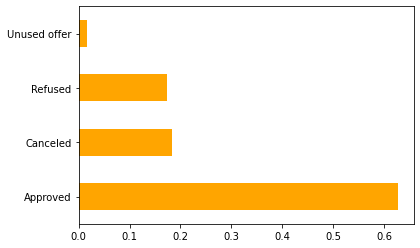

In [398]:
merged_data.NAME_CONTRACT_STATUS.value_counts(normalize=True).plot.barh(color='orange')
plt.show()

- Approval Rate is 62.68%
- Rejection Rate is 17.36%
- Cancellation Rate is 18.35%

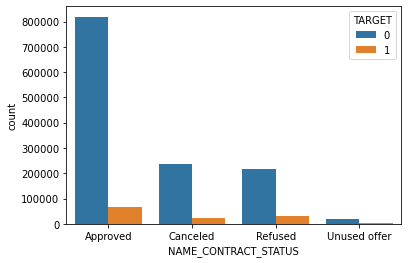

In [397]:
sns.countplot(x='NAME_CONTRACT_STATUS',hue='TARGET',data=merged_data)
plt.show()

- Loans Previously Refused have High Default Rate

---

## 6. Observations & Recommendations 

- 8.07% Clients Defaulted on Installment Payments.
- Distribution concludes this is Highly Imbalanced Dataset.
- Proportion of Females Applying for Loans & Defaulting is High. So, Targeting Must be focused on Males.
- Elderly are taking most loans, but least likely to Default. Young(30-40) come second, but they're most likely to Default. So, this Group must be Scrutinized well before Loan Approval.
- Proportion of Clients not Owning Car & Defaulting is High & Clients Owning Car & Defaulting is Low.
- Proportion of clients Owning House & Defaulting is Very High. Clients Not Owning House & Defaulting is Low.
- Clients Not Owning Car & House must be Avoided. Clients Owning Car & Not Owning House must be Targeted.
- Lending is done more in Cash Loans which has very High Defaults. Cash loans must be Scrutinized well & Revolving loans must be Approved as it has Low Defaults.
- Defaults amongst Unaccompanied Clients is very High & must be Scrutinized well. Clients Accompanied by Group of People be Preferred.
- Very High Defaults amongst Working Class, Commercial associates, Pensioners, on Maternity leave & Unemployed Class & must be Scrutinized well.
- Very Low Income Clients has High Defaults & must be Scrutinized well. Low Income Youth must be Avoided & Ultra Rich Elderly must be Targeted.
- Clients with Lower Secondary Education must be Avoided & Academic Degree Holder Clients must be Targeted.
- Very High Defaults in Married Clients
- Defaults amongst Clients staying in their own House or with Parents is Very High. Clients staying in Office or Co-Op Apartments must be preferred.
- Defaults amongst Laborers & Sales Staff is very High & must be avoided. IT & HR Staff clients be targeted.
- Defaults amongst Business Entities & Self-employed is very High. So, must be Scrutinized thoroughly. Trade & Industry Type Occupations preferred.


- Outliers exist in many Numerical Variables & must be treated.Now, these may well be valid records but considering them may skew our Analysis.
- Most Numerical Variables follow same Distribution & Pattern across Defaulting & Non Defaulting Clients
- Median Age of Defaulting Clients is lower compared to Non Defaulting Clients
- Defaulting clients Change their Identity Document, Registration & Phone little sooner before application
- Defaulting clients started application little early in their current employment

- Variables with Highest Correlation are the same in both Defaulting & Non Defaulting Clients
- There is Inverse Correlation between :
    - Client's Age & Number of Children
    - Client's Age & Number of Family Member
- For Non Defaulting Clients, High Correlation in Loan Annuity & Income of Client.

---